# UMAP clustering for the methylation signature Position Weight Matrices
## Wastewater data

In [ ]:
import pandas as pd
import numpy as np
import warnings

from matplotlib.colors import ListedColormap

import os 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import umap
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import seaborn as sns
import os
from PIL import Image, ImageFont
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
import matplotlib.lines as mlines


seed = 98
import matplotlib.pyplot as plt
import seaborn as sns

# EFF1 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_matrices_top50/flattened/EFF1_concat_matrices_top50.tsv'
EFF1_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(EFF1_matrices.shape[0])

In [ ]:
print(EFF1_matrices.shape)
EFF1_matrices.head()

In [ ]:
EFF1_df = EFF1_matrices.loc[(EFF1_matrices.iloc[:, :492] != 0).any(axis=1)]

In [ ]:
EFF1_df['sample'].value_counts()
print(EFF1_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_mod_counts.txt'

EFF1_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_mod_counts.shape[0])
EFF1_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_mod_counts.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_mod_counts.loc[EFF1_df_ext.index]

# Check the min mod counts
EFF1_df_ordered['mod_count'].min()

In [ ]:
# Log transform
EFF1_df_ordered['mod_count_log'] = np.log2(EFF1_df_ordered['mod_count'])

EFF1_df_mod_counts = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_mod_counts.iloc[:, :-3])
EFF1_df_mod_counts.head()
EFF1_df = EFF1_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_ARG_counts.txt'

EFF1_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_ARG_counts.shape[0])
EFF1_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_ARG_counts.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_ARG_counts.loc[EFF1_df_ext.index]

EFF1_df_ARG_counts = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_ARG_counts.iloc[:, :-4])
EFF1_df_ARG_counts.head()
EFF1_df = EFF1_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_ARG_names.txt'

EFF1_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_ARG_names.shape[0])
EFF1_df_ARG_names.head()

# Replace NaN with empty
EFF1_df_ARG_names = EFF1_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_ARG_names.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_ARG_names.loc[EFF1_df_ext.index]

EFF1_df_ARG_names = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_ARG_names.iloc[:, :-5])
EFF1_df_ARG_names.head()
EFF1_df = EFF1_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_contigs_lengths.txt'

EFF1_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_contigs_lengths.shape[0])
EFF1_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_contigs_lengths.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_contigs_lengths.loc[EFF1_df_ext.index]

# Log transform
EFF1_df_ordered['length_sqrt'] = np.sqrt(EFF1_df_ordered['length'])

# Concat
EFF1_df_contigs_lengths = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_contigs_lengths.iloc[:, :-7])
EFF1_df_contigs_lengths.head()
EFF1_df = EFF1_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_contigs/EFF1_fARGene_names.txt'

EFF1_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF1_df_fARGene_names.shape[0])
EFF1_df_fARGene_names.head()

# Replace NaN with empty
EFF1_df_fARGene_names = EFF1_df_fARGene_names.fillna('')
EFF1_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
EFF1_df_ext = EFF1_df.copy()
EFF1_df_ext.head()
EFF1_df_fARGene_names.head()

# Reorder to match
EFF1_df_ordered = EFF1_df_fARGene_names.loc[EFF1_df_ext.index]

EFF1_df_fARGene_names = pd.concat([EFF1_df_ext, EFF1_df_ordered], axis=1)
print(EFF1_df_fARGene_names.iloc[:, :-8])
EFF1_df_fARGene_names.head()
EFF1_df = EFF1_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = EFF1_df[EFF1_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
EFF1_df.head()
#print(EFF1_df.iloc[:, :-8])
#print(EFF1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF1_df.iloc[:, :-8])
        EFF1_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': EFF1_df.index,
            'mod_count':EFF1_df['mod_count'],
            'mod_count_log':EFF1_df['mod_count_log'],
            'ARG_name':EFF1_df['ARG_name'],
            'ARG_count':EFF1_df['ARG_count'],
            'contig_length':EFF1_df['length'],
            'contig_length_sqrt':EFF1_df['length_sqrt'],
            'fARGene_class':EFF1_df['fARGene']
        })

        #EFF1_UMAP_df['ARG_count'] = EFF1_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(EFF1_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        #fig.write_image(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_mod_counts_lengths.png')
        #fig.write_html(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF1_UMAP_df_focused = EFF1_UMAP_df.loc[(EFF1_UMAP_df['UMAP1']>= 3) & (EFF1_UMAP_df['UMAP1']<= 15)
    & (EFF1_UMAP_df['UMAP2']>= 1.5) & (EFF1_UMAP_df['UMAP2']<= 17)]

# Check
EFF1_UMAP_df_focused.head()

EFF1_df_focused = EFF1_df[EFF1_df.index.isin(EFF1_UMAP_df_focused['contig'])]
print(EFF1_df_focused)

In [ ]:
# Save contig IDs
EFF1_focused_contigs = EFF1_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF1_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF1_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(EFF1_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#b4f3f5', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF1_df_focused.iloc[:, :-8])
        EFF1_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': EFF1_df_focused.index,
            'mod_count':EFF1_df_focused['mod_count'],
            'mod_count_log':EFF1_df_focused['mod_count_log'],
            'ARG_name':EFF1_df_focused['ARG_name'],
            'ARG_count':EFF1_df_focused['ARG_count'],
            'contig_length':EFF1_df_focused['length'],
            'contig_length_sqrt':EFF1_df_focused['length_sqrt'],
            'fARGene_class':EFF1_df_focused['fARGene']
        })

        EFF1_UMAP_df_focused['ARG_count'] = EFF1_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(EFF1_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            title=f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
#EFF1_df_focused.head()
#EFF1_UMAP_df_focused.head()

In [ ]:
# Save data
EFF1_df_focused.to_csv('UMAP_WW_above50/EFF1_df_focused.csv', sep='\t', index=True)
EFF1_UMAP_df_focused.to_csv('UMAP_WW_above50/EFF1_UMAP_df_focused.csv', sep='\t', index=True)

# EFF1: Read in and plot

In [ ]:
# Read data
EFF1_df_focused = pd.read_csv('UMAP_WW_above50/EFF1_df_focused.csv', sep='\t', index_col=0, low_memory=False)
EFF1_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/EFF1_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
EFF1_df_focused.head()
EFF1_UMAP_df_focused.head()

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#b4f3f5', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

EFF1_UMAP_df_focused['ARG_count'] = EFF1_UMAP_df_focused['ARG_count'].astype(str)

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF1_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(EFF1_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
#fig.write_image(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_focused_ARG_counts.png')
#fig.write_html(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF1_df_focused_C1 = EFF1_UMAP_df_focused.loc[(EFF1_UMAP_df_focused['UMAP1']>= 2) & (EFF1_UMAP_df_focused['UMAP1']<= 2.2)
    & (EFF1_UMAP_df_focused['UMAP2']>= 3.6) & (EFF1_UMAP_df_focused['UMAP2']<= 3.7)]

# Check
EFF1_df_focused_C1.head()

EFF1_df_C1 = EFF1_df_focused[EFF1_df_focused.index.isin(EFF1_df_focused_C1['contig'])]
print(EFF1_df_C1)

In [ ]:
# Save contig IDs
EFF1_C1_contigs = EFF1_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF1_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF1_C1_contigs:
        file.write(f"{item}\n")

## Plot fARGene

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#b4f3f5', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

EFF1_UMAP_df_focused['fARGene_class'] = EFF1_UMAP_df_focused['fARGene_class'].astype(str)
EFF1_UMAP_df_focused['fARGene_class'] = EFF1_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF1_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(EFF1_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater EFF1 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/EFF1_UMAP_{n}_{m}_fARGene.html')

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF1_df_focused_C1f = EFF1_UMAP_df_focused.loc[(EFF1_UMAP_df_focused['UMAP1']>= 2.3) & (EFF1_UMAP_df_focused['UMAP1']<= 2.35)
    & (EFF1_UMAP_df_focused['UMAP2']>= 1.6) & (EFF1_UMAP_df_focused['UMAP2']<= 1.65)]

# Check
EFF1_df_focused_C1f.head()

EFF1_df_C1f = EFF1_df_focused[EFF1_df_focused.index.isin(EFF1_df_focused_C1f['contig'])]
print(EFF1_df_C1f)

In [ ]:
# Save contig IDs
EFF1_C1f_contigs = EFF1_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF1_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF1_C1f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C2f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF1_df_focused_C2f = EFF1_UMAP_df_focused.loc[(EFF1_UMAP_df_focused['UMAP1']>= 2.8) & (EFF1_UMAP_df_focused['UMAP1']<= 3)
    & (EFF1_UMAP_df_focused['UMAP2']>= 4.2) & (EFF1_UMAP_df_focused['UMAP2']<= 4.3)]

# Check
EFF1_df_focused_C2f.head()

EFF1_df_C2f = EFF1_df_focused[EFF1_df_focused.index.isin(EFF1_df_focused_C2f['contig'])]
print(EFF1_df_C2f)

In [ ]:
# Save contig IDs
EFF1_C2f_contigs = EFF1_df_C2f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF1_C2f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF1_C2f_contigs:
        file.write(f"{item}\n")

# EFF2 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF2_matrices_top50/flattened/EFF2_concat_matrices_top50.tsv'
EFF2_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(EFF2_matrices.shape[0])

In [ ]:
print(EFF2_matrices.shape)
EFF2_matrices.head()

In [ ]:
EFF2_df = EFF2_matrices.loc[(EFF2_matrices.iloc[:, :492] != 0).any(axis=1)]

In [ ]:
EFF2_df['sample'].value_counts()
print(EFF2_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF2_contigs/EFF2_mod_counts.txt'

EFF2_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF2_df_mod_counts.shape[0])
EFF2_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
EFF2_df_ext = EFF2_df.copy()
EFF2_df_ext.head()
EFF2_df_mod_counts.head()

# Reorder to match
EFF2_df_ordered = EFF2_df_mod_counts.loc[EFF2_df_ext.index]

# Check the min mod counts
EFF2_df_ordered['mod_count'].min()

In [ ]:
# Log transform
EFF2_df_ordered['mod_count_log'] = np.log2(EFF2_df_ordered['mod_count'])

EFF2_df_mod_counts = pd.concat([EFF2_df_ext, EFF2_df_ordered], axis=1)
print(EFF2_df_mod_counts.iloc[:, :-3])
EFF2_df_mod_counts.head()
EFF2_df = EFF2_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF2_contigs/EFF2_ARG_counts.txt'

EFF2_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF2_df_ARG_counts.shape[0])
EFF2_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
EFF2_df_ext = EFF2_df.copy()
EFF2_df_ext.head()
EFF2_df_ARG_counts.head()

# Reorder to match
EFF2_df_ordered = EFF2_df_ARG_counts.loc[EFF2_df_ext.index]

EFF2_df_ARG_counts = pd.concat([EFF2_df_ext, EFF2_df_ordered], axis=1)
print(EFF2_df_ARG_counts.iloc[:, :-4])
EFF2_df_ARG_counts.head()
EFF2_df = EFF2_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF2_contigs/EFF2_ARG_names.txt'

EFF2_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF2_df_ARG_names.shape[0])
EFF2_df_ARG_names.head()

# Replace NaN with empty
EFF2_df_ARG_names = EFF2_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
EFF2_df_ext = EFF2_df.copy()
EFF2_df_ext.head()
EFF2_df_ARG_names.head()

# Reorder to match
EFF2_df_ordered = EFF2_df_ARG_names.loc[EFF2_df_ext.index]

EFF2_df_ARG_names = pd.concat([EFF2_df_ext, EFF2_df_ordered], axis=1)
print(EFF2_df_ARG_names.iloc[:, :-5])
EFF2_df_ARG_names.head()
EFF2_df = EFF2_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF2_contigs/EFF2_contigs_lengths.txt'

EFF2_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF2_df_contigs_lengths.shape[0])
EFF2_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
EFF2_df_ext = EFF2_df.copy()
EFF2_df_ext.head()
EFF2_df_contigs_lengths.head()

# Reorder to match
EFF2_df_ordered = EFF2_df_contigs_lengths.loc[EFF2_df_ext.index]

# Log transform
EFF2_df_ordered['length_sqrt'] = np.sqrt(EFF2_df_ordered['length'])

# Concat
EFF2_df_contigs_lengths = pd.concat([EFF2_df_ext, EFF2_df_ordered], axis=1)
print(EFF2_df_contigs_lengths.iloc[:, :-7])
EFF2_df_contigs_lengths.head()
EFF2_df = EFF2_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF2_contigs/EFF2_fARGene_names.txt'

EFF2_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF2_df_fARGene_names.shape[0])
EFF2_df_fARGene_names.head()

# Replace NaN with empty
EFF2_df_fARGene_names = EFF2_df_fARGene_names.fillna('')
EFF2_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
EFF2_df_ext = EFF2_df.copy()
EFF2_df_ext.head()
EFF2_df_fARGene_names.head()

# Reorder to match
EFF2_df_ordered = EFF2_df_fARGene_names.loc[EFF2_df_ext.index]

EFF2_df_fARGene_names = pd.concat([EFF2_df_ext, EFF2_df_ordered], axis=1)
print(EFF2_df_fARGene_names.iloc[:, :-8])
EFF2_df_fARGene_names.head()
EFF2_df = EFF2_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = EFF2_df[EFF2_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
EFF2_df.head()
#print(EFF1_df.iloc[:, :-8])
#print(EFF1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF2_df.iloc[:, :-8])
        EFF2_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': EFF2_df.index,
            'mod_count':EFF2_df['mod_count'],
            'mod_count_log':EFF2_df['mod_count_log'],
            'ARG_name':EFF2_df['ARG_name'],
            'ARG_count':EFF2_df['ARG_count'],
            'contig_length':EFF2_df['length'],
            'contig_length_sqrt':EFF2_df['length_sqrt'],
            'fARGene_class':EFF2_df['fARGene']
        })

        #EFF2_UMAP_df['ARG_count'] = EFF2_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(EFF2_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater EFF2 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater EFF2 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_above50/EFF2_UMAP_{n}_{m}_mod_counts_lengths.png')
        fig.write_html(f'UMAP_WW_above50/EFF2_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_UMAP_df_focused = EFF2_UMAP_df.loc[(EFF2_UMAP_df['UMAP1']>= 3) & (EFF2_UMAP_df['UMAP1']<= 15)
    & (EFF2_UMAP_df['UMAP2']>= -2) & (EFF2_UMAP_df['UMAP2']<= 16)]

# Check
EFF2_UMAP_df_focused.head()

EFF2_df_focused = EFF2_df[EFF2_df.index.isin(EFF2_UMAP_df_focused['contig'])]
print(EFF2_df_focused)

In [ ]:
# Save contig IDs
EFF2_focused_contigs = EFF2_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(EFF2_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#b4f3f5', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF2_df_focused.iloc[:, :-8])
        EFF2_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': EFF2_df_focused.index,
            'mod_count':EFF2_df_focused['mod_count'],
            'mod_count_log':EFF2_df_focused['mod_count_log'],
            'ARG_name':EFF2_df_focused['ARG_name'],
            'ARG_count':EFF2_df_focused['ARG_count'],
            'contig_length':EFF2_df_focused['length'],
            'contig_length_sqrt':EFF2_df_focused['length_sqrt'],
            'fARGene_class':EFF2_df_focused['fARGene']
        })

        EFF2_UMAP_df_focused['ARG_count'] = EFF2_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(EFF2_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            title=f' Wastewater EFF2 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater EFF2 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
#EFF2_df_focused.head()
#EFF2_UMAP_df_focused.head()

In [ ]:
# Save data
EFF2_df_focused.to_csv('UMAP_WW_above50/EFF2_df_focused.csv', sep='\t', index=True)
EFF2_UMAP_df_focused.to_csv('UMAP_WW_above50/EFF2_UMAP_df_focused.csv', sep='\t', index=True)

# EFF2: Read in and plot

In [ ]:
# Read data
EFF2_df_focused = pd.read_csv('UMAP_WW_above50/EFF2_df_focused.csv', sep='\t', index_col=0, low_memory=False)
EFF2_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/EFF2_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
EFF2_df_focused.head()
EFF2_UMAP_df_focused.head()

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#b4f3f5', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

EFF2_UMAP_df_focused['ARG_count'] = EFF2_UMAP_df_focused['ARG_count'].astype(str)

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF2_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(EFF2_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater EFF2 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater EFF2 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
#fig.write_image(f'UMAP_WW_above50/EFF2_UMAP_{n}_{m}_focused_ARG_counts.png')
#fig.write_html(f'UMAP_WW_above50/EFF2_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C1 = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 9) & (EFF2_UMAP_df_focused['UMAP1']<= 9.1)
    & (EFF2_UMAP_df_focused['UMAP2']>= 7.65) & (EFF2_UMAP_df_focused['UMAP2']<= 7.7)]

# Check
EFF2_df_focused_C1.head()

EFF2_df_C1 = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C1['contig'])]
print(EFF2_df_C1)

In [ ]:
# Save contig IDs
EFF2_C1_contigs = EFF2_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C1_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C2

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C2 = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 8.15) & (EFF2_UMAP_df_focused['UMAP1']<= 8.2)
    & (EFF2_UMAP_df_focused['UMAP2']>= 8.61) & (EFF2_UMAP_df_focused['UMAP2']<= 8.62)]

# Check
EFF2_df_focused_C2.head()

EFF2_df_C2 = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C2['contig'])]
print(EFF2_df_C2)

In [ ]:
# Save contig IDs
EFF2_C2_contigs = EFF2_df_C2.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C2_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C2_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C3

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C3 = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 7.5) & (EFF2_UMAP_df_focused['UMAP1']<= 8)
    & (EFF2_UMAP_df_focused['UMAP2']>= -0.6) & (EFF2_UMAP_df_focused['UMAP2']<= -0.4)]

# Check
EFF2_df_focused_C3.head()

EFF2_df_C3 = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C3['contig'])]
print(EFF2_df_C3)

In [ ]:
# Save contig IDs
EFF2_C3_contigs = EFF2_df_C3.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C3_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C3_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C4

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C4 = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 3) & (EFF2_UMAP_df_focused['UMAP1']<= 3.2)
    & (EFF2_UMAP_df_focused['UMAP2']>= 11.2) & (EFF2_UMAP_df_focused['UMAP2']<= 11.3)]

# Check
EFF2_df_focused_C4.head()

EFF2_df_C4 = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C4['contig'])]
print(EFF2_df_C4)

In [ ]:
# Save contig IDs
EFF2_C4_contigs = EFF2_df_C4.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C4_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C4_contigs:
        file.write(f"{item}\n")

## Plot fARGene

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#b4f3f5', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

EFF2_UMAP_df_focused['fARGene_class'] = EFF2_UMAP_df_focused['fARGene_class'].astype(str)
EFF2_UMAP_df_focused['fARGene_class'] = EFF2_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF2_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(EFF2_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater EFF2 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater EFF2 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/EFF2_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/EFF2_UMAP_{n}_{m}_fARGene.html')

In [ ]:
print(EFF2_UMAP_df_focused['fARGene_class'].unique())

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C1f = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 9.8) & (EFF2_UMAP_df_focused['UMAP1']<= 10)
    & (EFF2_UMAP_df_focused['UMAP2']>= 4.3) & (EFF2_UMAP_df_focused['UMAP2']<= 4.5)]

# Check
EFF2_df_focused_C1f.head()

EFF2_df_C1f = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C1f['contig'])]
print(EFF2_df_C1f)

In [ ]:
# Save contig IDs
EFF2_C1f_contigs = EFF2_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C1f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C2f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C2f = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 11.6) & (EFF2_UMAP_df_focused['UMAP1']<= 11.8)
    & (EFF2_UMAP_df_focused['UMAP2']>= 5.6) & (EFF2_UMAP_df_focused['UMAP2']<= 5.7)]

# Check
EFF2_df_focused_C2f.head()

EFF2_df_C2f = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C2f['contig'])]
print(EFF2_df_C2f)

In [ ]:
# Save contig IDs
EFF2_C2f_contigs = EFF2_df_C2f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C2f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C2f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C3f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C3f = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 9.55) & (EFF2_UMAP_df_focused['UMAP1']<= 9.65)
    & (EFF2_UMAP_df_focused['UMAP2']>= 7.85) & (EFF2_UMAP_df_focused['UMAP2']<= 7.95)]

# Check
EFF2_df_focused_C3f.head()

EFF2_df_C3f = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C3f['contig'])]
print(EFF2_df_C3f)

In [ ]:
# Save contig IDs
EFF2_C3f_contigs = EFF2_df_C3f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C3f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C3f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C4f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C4f = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 9.54) & (EFF2_UMAP_df_focused['UMAP1']<= 9.6)
    & (EFF2_UMAP_df_focused['UMAP2']>= 7.405) & (EFF2_UMAP_df_focused['UMAP2']<= 7.45)]

# Check
EFF2_df_focused_C4f.head()

EFF2_df_C4f = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C4f['contig'])]
print(EFF2_df_C4f)

In [ ]:
# Save contig IDs
EFF2_C4f_contigs = EFF2_df_C4f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C4f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C4f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C5f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C5f = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 7.2) & (EFF2_UMAP_df_focused['UMAP1']<= 7.4)
    & (EFF2_UMAP_df_focused['UMAP2']>= 9.08) & (EFF2_UMAP_df_focused['UMAP2']<= 9.12)]

# Check
EFF2_df_focused_C5f.head()

EFF2_df_C5f = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C5f['contig'])]
print(EFF2_df_C5f)

In [ ]:
# Save contig IDs
EFF2_C5f_contigs = EFF2_df_C5f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C5f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C5f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C6f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF2_df_focused_C6f = EFF2_UMAP_df_focused.loc[(EFF2_UMAP_df_focused['UMAP1']>= 7.8) & (EFF2_UMAP_df_focused['UMAP1']<= 8)
    & (EFF2_UMAP_df_focused['UMAP2']>= 9.5) & (EFF2_UMAP_df_focused['UMAP2']<= 9.55)]

# Check
EFF2_df_focused_C6f.head()

EFF2_df_C6f = EFF2_df_focused[EFF2_df_focused.index.isin(EFF2_df_focused_C6f['contig'])]
print(EFF2_df_C6f)

In [ ]:
# Save contig IDs
EFF2_C6f_contigs = EFF2_df_C6f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF2_C6f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF2_C6f_contigs:
        file.write(f"{item}\n")

# EFF3 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF3_matrices_top50/flattened/EFF3_concat_matrices_top50.tsv'
EFF3_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(EFF3_matrices.shape[0])

In [ ]:
print(EFF3_matrices.shape)
EFF3_matrices.head()

In [ ]:
EFF3_df = EFF3_matrices.loc[(EFF3_matrices.iloc[:, :492] != 0).any(axis=1)]

In [ ]:
EFF3_df['sample'].value_counts()
print(EFF3_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF3_contigs/EFF3_mod_counts.txt'

EFF3_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF3_df_mod_counts.shape[0])
EFF3_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
EFF3_df_ext = EFF3_df.copy()
EFF3_df_ext.head()
EFF3_df_mod_counts.head()

# Reorder to match
EFF3_df_ordered = EFF3_df_mod_counts.loc[EFF3_df_ext.index]

# Check the min mod counts
EFF3_df_ordered['mod_count'].min()

In [ ]:
# Log transform
EFF3_df_ordered['mod_count_log'] = np.log2(EFF3_df_ordered['mod_count'])

EFF3_df_mod_counts = pd.concat([EFF3_df_ext, EFF3_df_ordered], axis=1)
print(EFF3_df_mod_counts.iloc[:, :-3])
EFF3_df_mod_counts.head()
EFF3_df = EFF3_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF3_contigs/EFF3_ARG_counts.txt'

EFF3_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF3_df_ARG_counts.shape[0])
EFF3_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
EFF3_df_ext = EFF3_df.copy()
EFF3_df_ext.head()
EFF3_df_ARG_counts.head()

# Reorder to match
EFF3_df_ordered = EFF3_df_ARG_counts.loc[EFF3_df_ext.index]

EFF3_df_ARG_counts = pd.concat([EFF3_df_ext, EFF3_df_ordered], axis=1)
print(EFF3_df_ARG_counts.iloc[:, :-4])
EFF3_df_ARG_counts.head()
EFF3_df = EFF3_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF3_contigs/EFF3_ARG_names.txt'

EFF3_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF3_df_ARG_names.shape[0])
EFF3_df_ARG_names.head()

# Replace NaN with empty
EFF3_df_ARG_names = EFF3_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
EFF3_df_ext = EFF3_df.copy()
EFF3_df_ext.head()
EFF3_df_ARG_names.head()

# Reorder to match
EFF3_df_ordered = EFF3_df_ARG_names.loc[EFF3_df_ext.index]

EFF3_df_ARG_names = pd.concat([EFF3_df_ext, EFF3_df_ordered], axis=1)
print(EFF3_df_ARG_names.iloc[:, :-5])
EFF3_df_ARG_names.head()
EFF3_df = EFF3_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF3_contigs/EFF3_contigs_lengths.txt'

EFF3_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF3_df_contigs_lengths.shape[0])
EFF3_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
EFF3_df_ext = EFF3_df.copy()
EFF3_df_ext.head()
EFF3_df_contigs_lengths.head()

# Reorder to match
EFF3_df_ordered = EFF3_df_contigs_lengths.loc[EFF3_df_ext.index]

# Log transform
EFF3_df_ordered['length_sqrt'] = np.sqrt(EFF3_df_ordered['length'])

# Concat
EFF3_df_contigs_lengths = pd.concat([EFF3_df_ext, EFF3_df_ordered], axis=1)
print(EFF3_df_contigs_lengths.iloc[:, :-7])
EFF3_df_contigs_lengths.head()
EFF3_df = EFF3_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF3_contigs/EFF3_fARGene_names.txt'

EFF3_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(EFF3_df_fARGene_names.shape[0])
EFF3_df_fARGene_names.head()

# Replace NaN with empty
EFF3_df_fARGene_names = EFF3_df_fARGene_names.fillna('')
EFF3_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
EFF3_df_ext = EFF3_df.copy()
EFF3_df_ext.head()
EFF3_df_fARGene_names.head()

# Reorder to match
EFF3_df_ordered = EFF3_df_fARGene_names.loc[EFF3_df_ext.index]

EFF3_df_fARGene_names = pd.concat([EFF3_df_ext, EFF3_df_ordered], axis=1)
print(EFF3_df_fARGene_names.iloc[:, :-8])
EFF3_df_fARGene_names.head()
EFF3_df = EFF3_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = EFF3_df[EFF3_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
EFF3_df.head()
#print(EFF1_df.iloc[:, :-8])
#print(EFF1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF3_df.iloc[:, :-8])
        EFF3_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': EFF3_df.index,
            'mod_count':EFF3_df['mod_count'],
            'mod_count_log':EFF3_df['mod_count_log'],
            'ARG_name':EFF3_df['ARG_name'],
            'ARG_count':EFF3_df['ARG_count'],
            'contig_length':EFF3_df['length'],
            'contig_length_sqrt':EFF3_df['length_sqrt'],
            'fARGene_class':EFF3_df['fARGene']
        })

        #EFF3_UMAP_df['ARG_count'] = EFF3_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(EFF3_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater EFF3 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater EFF3 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_above50/EFF3_UMAP_{n}_{m}_mod_counts_lengths.png')
        fig.write_html(f'UMAP_WW_above50/EFF3_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF3_UMAP_df_focused = EFF3_UMAP_df.loc[(EFF3_UMAP_df['UMAP1']>= 0) & (EFF3_UMAP_df['UMAP1']<= 12)
    & (EFF3_UMAP_df['UMAP2']>= -1) & (EFF3_UMAP_df['UMAP2']<= 16)]

# Check
EFF3_UMAP_df_focused.head()

EFF3_df_focused = EFF3_df[EFF3_df.index.isin(EFF3_UMAP_df_focused['contig'])]
print(EFF3_df_focused)

In [ ]:
# Save contig IDs
EFF3_focused_contigs = EFF3_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF3_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF3_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(EFF3_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#b4f3f5', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF3_df_focused.iloc[:, :-8])
        EFF3_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': EFF3_df_focused.index,
            'mod_count':EFF3_df_focused['mod_count'],
            'mod_count_log':EFF3_df_focused['mod_count_log'],
            'ARG_name':EFF3_df_focused['ARG_name'],
            'ARG_count':EFF3_df_focused['ARG_count'],
            'contig_length':EFF3_df_focused['length'],
            'contig_length_sqrt':EFF3_df_focused['length_sqrt'],
            'fARGene_class':EFF3_df_focused['fARGene']
        })

        EFF3_UMAP_df_focused['ARG_count'] = EFF3_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(EFF3_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            title=f' Wastewater EFF3 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater EFF3 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
#EFF3_df_focused.head()
#EFF3_UMAP_df_focused.head()

In [ ]:
# Save data
EFF3_df_focused.to_csv('UMAP_WW_above50/EFF3_df_focused.csv', sep='\t', index=True)
EFF3_UMAP_df_focused.to_csv('UMAP_WW_above50/EFF3_UMAP_df_focused.csv', sep='\t', index=True)

# EFF3: Read in and plot

In [ ]:
# Read data
EFF3_df_focused = pd.read_csv('UMAP_WW_above50/EFF3_df_focused.csv', sep='\t', index_col=0, low_memory=False)
EFF3_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/EFF3_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
EFF3_df_focused.head()
EFF3_UMAP_df_focused.head()

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#b4f3f5', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}
category_order = ["0", "1", "2", "3"]

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

EFF3_UMAP_df_focused['ARG_count'] = EFF3_UMAP_df_focused['ARG_count'].astype(str)

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF3_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(EFF3_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater EFF3 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_sequence=custom_colors,
                 category_orders={'ARG_count': category_order},
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater EFF3 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/EFF3_UMAP_{n}_{m}_focused_ARG_counts.png')
fig.write_html(f'UMAP_WW_above50/EFF3_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF3_df_focused_C1 = EFF3_UMAP_df_focused.loc[(EFF3_UMAP_df_focused['UMAP1']>= 7.1) & (EFF3_UMAP_df_focused['UMAP1']<= 7.3)
    & (EFF3_UMAP_df_focused['UMAP2']>= 6.6) & (EFF3_UMAP_df_focused['UMAP2']<= 6.7)]

# Check
EFF3_df_focused_C1.head()

EFF3_df_C1 = EFF3_df_focused[EFF3_df_focused.index.isin(EFF3_df_focused_C1['contig'])]
print(EFF3_df_C1)

In [ ]:
# Save contig IDs
EFF3_C1_contigs = EFF3_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF3_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF3_C1_contigs:
        file.write(f"{item}\n")

## Plot fARGene

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#b4f3f5', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

EFF3_UMAP_df_focused['fARGene_class'] = EFF3_UMAP_df_focused['fARGene_class'].astype(str)
EFF3_UMAP_df_focused['fARGene_class'] = EFF3_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(EFF3_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(EFF3_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater EFF3 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater EFF3 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/EFF3_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/EFF3_UMAP_{n}_{m}_fARGene.html')

In [ ]:
print(EFF3_UMAP_df_focused['fARGene_class'].unique())

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF3_df_focused_C1f = EFF3_UMAP_df_focused.loc[(EFF3_UMAP_df_focused['UMAP1']>= 4) & (EFF3_UMAP_df_focused['UMAP1']<= 4.3)
    & (EFF3_UMAP_df_focused['UMAP2']>= 10.1) & (EFF3_UMAP_df_focused['UMAP2']<= 10.3)]

# Check
EFF3_df_focused_C1f.head()

EFF3_df_C1f = EFF3_df_focused[EFF3_df_focused.index.isin(EFF3_df_focused_C1f['contig'])]
print(EFF3_df_C1f)

In [ ]:
# Save contig IDs
EFF3_C1f_contigs = EFF3_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF3_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF3_C1f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C2f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF3_df_focused_C2f = EFF3_UMAP_df_focused.loc[(EFF3_UMAP_df_focused['UMAP1']>= 4) & (EFF3_UMAP_df_focused['UMAP1']<= 4.1)
    & (EFF3_UMAP_df_focused['UMAP2']>= 9.72) & (EFF3_UMAP_df_focused['UMAP2']<= 9.73)]

# Check
EFF3_df_focused_C2f.head()

EFF3_df_C2f = EFF3_df_focused[EFF3_df_focused.index.isin(EFF3_df_focused_C2f['contig'])]
print(EFF3_df_C2f)

In [ ]:
# Save contig IDs
EFF3_C2f_contigs = EFF3_df_C2f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF3_C2f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF3_C2f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C3f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF3_df_focused_C3f = EFF3_UMAP_df_focused.loc[(EFF3_UMAP_df_focused['UMAP1']>= 0.68) & (EFF3_UMAP_df_focused['UMAP1']<= 0.8)
    & (EFF3_UMAP_df_focused['UMAP2']>= 6.63) & (EFF3_UMAP_df_focused['UMAP2']<= 6.65)]

# Check
EFF3_df_focused_C3f.head()

EFF3_df_C3f = EFF3_df_focused[EFF3_df_focused.index.isin(EFF3_df_focused_C3f['contig'])]
print(EFF3_df_C3f)

In [ ]:
# Save contig IDs
EFF3_C3f_contigs = EFF3_df_C3f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF3_C3f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF3_C3f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C4f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
EFF3_df_focused_C4f = EFF3_UMAP_df_focused.loc[(EFF3_UMAP_df_focused['UMAP1']>= 4.4) & (EFF3_UMAP_df_focused['UMAP1']<= 4.45)
    & (EFF3_UMAP_df_focused['UMAP2']>= 9.55) & (EFF3_UMAP_df_focused['UMAP2']<= 9.57)]

# Check
EFF3_df_focused_C4f.head()

EFF3_df_C4f = EFF3_df_focused[EFF3_df_focused.index.isin(EFF3_df_focused_C4f['contig'])]
print(EFF3_df_C4f)

In [ ]:
# Save contig IDs
EFF3_C4f_contigs = EFF3_df_C4f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'EFF3_C4f_contigs.txt')

with open(file_path, 'w') as file:
    for item in EFF3_C4f_contigs:
        file.write(f"{item}\n")

# INF1 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF1_matrices_top50/flattened/INF1_concat_matrices_top50.tsv'
INF1_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(INF1_matrices.shape[0])

In [ ]:
print(INF1_matrices.shape)
INF1_matrices.head()

In [ ]:
INF1_df = INF1_matrices.loc[(INF1_matrices.iloc[:, :492] != 0).any(axis=1)]

In [ ]:
INF1_df['sample'].value_counts()
print(INF1_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF1_contigs/INF1_mod_counts.txt'

INF1_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF1_df_mod_counts.shape[0])
INF1_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
INF1_df_ext = INF1_df.copy()
INF1_df_ext.head()
INF1_df_mod_counts.head()

# Reorder to match
INF1_df_ordered = INF1_df_mod_counts.loc[INF1_df_ext.index]

# Check the min mod counts
INF1_df_ordered['mod_count'].min()

In [ ]:
# Log transform
INF1_df_ordered['mod_count_log'] = np.log2(INF1_df_ordered['mod_count'])

INF1_df_mod_counts = pd.concat([INF1_df_ext, INF1_df_ordered], axis=1)
print(INF1_df_mod_counts.iloc[:, :-3])
INF1_df_mod_counts.head()
INF1_df = INF1_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF1_contigs/INF1_ARG_counts.txt'

INF1_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF1_df_ARG_counts.shape[0])
INF1_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
INF1_df_ext = INF1_df.copy()
INF1_df_ext.head()
INF1_df_ARG_counts.head()

# Reorder to match
INF1_df_ordered = INF1_df_ARG_counts.loc[INF1_df_ext.index]

INF1_df_ARG_counts = pd.concat([INF1_df_ext, INF1_df_ordered], axis=1)
print(INF1_df_ARG_counts.iloc[:, :-4])
INF1_df_ARG_counts.head()
INF1_df = INF1_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF1_contigs/INF1_ARG_names.txt'

INF1_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF1_df_ARG_names.shape[0])
INF1_df_ARG_names.head()

# Replace NaN with empty
INF1_df_ARG_names = INF1_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
INF1_df_ext = INF1_df.copy()
INF1_df_ext.head()
INF1_df_ARG_names.head()

# Reorder to match
INF1_df_ordered = INF1_df_ARG_names.loc[INF1_df_ext.index]

INF1_df_ARG_names = pd.concat([INF1_df_ext, INF1_df_ordered], axis=1)
print(INF1_df_ARG_names.iloc[:, :-5])
INF1_df_ARG_names.head()
INF1_df = INF1_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF1_contigs/INF1_contigs_lengths.txt'

INF1_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF1_df_contigs_lengths.shape[0])
INF1_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
INF1_df_ext = INF1_df.copy()
INF1_df_ext.head()
INF1_df_contigs_lengths.head()

# Reorder to match
INF1_df_ordered = INF1_df_contigs_lengths.loc[INF1_df_ext.index]

# Log transform
INF1_df_ordered['length_sqrt'] = np.sqrt(INF1_df_ordered['length'])

# Concat
INF1_df_contigs_lengths = pd.concat([INF1_df_ext, INF1_df_ordered], axis=1)
print(INF1_df_contigs_lengths.iloc[:, :-7])
INF1_df_contigs_lengths.head()
INF1_df = INF1_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF1_contigs/INF1_fARGene_names.txt'

INF1_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF1_df_fARGene_names.shape[0])
INF1_df_fARGene_names.head()

# Replace NaN with empty
INF1_df_fARGene_names = INF1_df_fARGene_names.fillna('')
INF1_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
INF1_df_ext = INF1_df.copy()
INF1_df_ext.head()
INF1_df_fARGene_names.head()

# Reorder to match
INF1_df_ordered = INF1_df_fARGene_names.loc[INF1_df_ext.index]

INF1_df_fARGene_names = pd.concat([INF1_df_ext, INF1_df_ordered], axis=1)
print(INF1_df_fARGene_names.iloc[:, :-8])
INF1_df_fARGene_names.head()
INF1_df = INF1_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = INF1_df[INF1_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
INF1_df.head()
#print(INF1_df.iloc[:, :-8])
#print(INF1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF1_df.iloc[:, :-8])
        INF1_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': INF1_df.index,
            'mod_count':INF1_df['mod_count'],
            'mod_count_log':INF1_df['mod_count_log'],
            'ARG_name':INF1_df['ARG_name'],
            'ARG_count':INF1_df['ARG_count'],
            'contig_length':INF1_df['length'],
            'contig_length_sqrt':INF1_df['length_sqrt'],
            'fARGene_class':INF1_df['fARGene']
        })

        #INF1_UMAP_df['ARG_count'] = INF1_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(INF1_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater INF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater INF1 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_above50/INF1_UMAP_{n}_{m}_mod_counts_lengths.png')
        fig.write_html(f'UMAP_WW_above50/INF1_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_UMAP_df_focused = INF1_UMAP_df.loc[(INF1_UMAP_df['UMAP1']>= 1) & (INF1_UMAP_df['UMAP1']<= 15)
    & (INF1_UMAP_df['UMAP2']>= -4) & (INF1_UMAP_df['UMAP2']<= 15)]

# Check
INF1_UMAP_df_focused.head()

INF1_df_focused = INF1_df[INF1_df.index.isin(INF1_UMAP_df_focused['contig'])]
print(INF1_df_focused)

In [ ]:
# Save contig IDs
INF1_focused_contigs = INF1_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(INF1_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#dcd377', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF1_df_focused.iloc[:, :-8])
        INF1_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': INF1_df_focused.index,
            'mod_count':INF1_df_focused['mod_count'],
            'mod_count_log':INF1_df_focused['mod_count_log'],
            'ARG_name':INF1_df_focused['ARG_name'],
            'ARG_count':INF1_df_focused['ARG_count'],
            'contig_length':INF1_df_focused['length'],
            'contig_length_sqrt':INF1_df_focused['length_sqrt'],
            'fARGene_class':INF1_df_focused['fARGene']
        })

        INF1_UMAP_df_focused['ARG_count'] = INF1_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(INF1_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            title=f' Wastewater INF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater INF1 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
INF1_df_focused.head()
INF1_UMAP_df_focused.head()

In [ ]:
# Save data
INF1_df_focused.to_csv('UMAP_WW_above50/INF1_df_focused.csv', sep='\t', index=True)
INF1_UMAP_df_focused.to_csv('UMAP_WW_above50/INF1_UMAP_df_focused.csv', sep='\t', index=True)

# INF1: Read in and plot

In [ ]:
# Read data
INF1_df_focused = pd.read_csv('UMAP_WW_above50/INF1_df_focused.csv', sep='\t', index_col=0, low_memory=False)
INF1_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/INF1_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
INF1_df_focused.head()
INF1_UMAP_df_focused.head()

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#dcd377', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

INF1_UMAP_df_focused['ARG_count'] = INF1_UMAP_df_focused['ARG_count'].astype(str)
category_order = ["0", "1", "2", "3"]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF1_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(INF1_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater INF1 - UMAP with n_neighbors={n}, min_dist={m}',
                 category_orders={'ARG_count': category_order},
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater INF1 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
#fig.write_image(f'UMAP_WW_above50/INF1_UMAP_{n}_{m}_focused_ARG_counts.png')
#fig.write_html(f'UMAP_WW_above50/INF1_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C1 = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= 5) & (INF1_UMAP_df_focused['UMAP1']<= 10)
    & (INF1_UMAP_df_focused['UMAP2']>= 5) & (INF1_UMAP_df_focused['UMAP2']<= 6.7)]

# Check
INF1_df_focused_C1.head()

INF1_df_C1 = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C1['contig'])]
print(INF1_df_C1)

In [ ]:
# Save contig IDs
INF1_C1_contigs = INF1_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C1_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C2

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C2 = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= 6.9) & (INF1_UMAP_df_focused['UMAP1']<= 7.2)
    & (INF1_UMAP_df_focused['UMAP2']>= 14.5) & (INF1_UMAP_df_focused['UMAP2']<= 14.6)]

# Check
INF1_df_focused_C2.head()

INF1_df_C2 = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C2['contig'])]
print(INF1_df_C2)

In [ ]:
# Save contig IDs
INF1_C2_contigs = INF1_df_C2.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C2_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C2_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C3

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C3 = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= 2.6) & (INF1_UMAP_df_focused['UMAP1']<= 2.8)
    & (INF1_UMAP_df_focused['UMAP2']>= 2.1) & (INF1_UMAP_df_focused['UMAP2']<= 2.2)]

# Check
INF1_df_focused_C3.head()

INF1_df_C3 = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C3['contig'])]
print(INF1_df_C3)

In [ ]:
# Save contig IDs
INF1_C3_contigs = INF1_df_C3.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C3_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C3_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C4

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C4 = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= -1.69) & (INF1_UMAP_df_focused['UMAP1']<= -1.635)
    & (INF1_UMAP_df_focused['UMAP2']>= -0.99) & (INF1_UMAP_df_focused['UMAP2']<= -0.93)]

# Check
INF1_df_focused_C4.head()

INF1_df_C4 = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C4['contig'])]
print(INF1_df_C4)

In [ ]:
# Save contig IDs
INF1_C4_contigs = INF1_df_C4.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C4_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C4_contigs:
        file.write(f"{item}\n")

## Plot fARGene

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#dcd377', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

INF1_UMAP_df_focused['fARGene_class'] = INF1_UMAP_df_focused['fARGene_class'].astype(str)
INF1_UMAP_df_focused['fARGene_class'] = INF1_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF1_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(INF1_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater INF1 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater INF1 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/INF1_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/INF1_UMAP_{n}_{m}_fARGene.html')

In [ ]:
print(INF1_UMAP_df_focused['fARGene_class'].unique())

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C1f = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= 3.65) & (INF1_UMAP_df_focused['UMAP1']<= 3.75)
    & (INF1_UMAP_df_focused['UMAP2']>= 4.53) & (INF1_UMAP_df_focused['UMAP2']<= 4.62)]

# Check
INF1_df_focused_C1f.head()

INF1_df_C1f = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C1f['contig'])]
print(INF1_df_C1f)

In [ ]:
# Save contig IDs
INF1_C1f_contigs = INF1_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C1f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C2f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C2f = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= -2.045) & (INF1_UMAP_df_focused['UMAP1']<= -1.9)
    & (INF1_UMAP_df_focused['UMAP2']>= 7.51) & (INF1_UMAP_df_focused['UMAP2']<= 7.6)]

# Check
INF1_df_focused_C2f.head()

INF1_df_C2f = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C2f['contig'])]
print(INF1_df_C2f)

In [ ]:
# Save contig IDs
INF1_C2f_contigs = INF1_df_C2f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C2f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C2f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C3f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C3f = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= -2.35) & (INF1_UMAP_df_focused['UMAP1']<= -2.2)
    & (INF1_UMAP_df_focused['UMAP2']>= 7.65) & (INF1_UMAP_df_focused['UMAP2']<= 7.76)]

# Check
INF1_df_focused_C3f.head()

INF1_df_C3f = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C3f['contig'])]
print(INF1_df_C3f)

In [ ]:
# Save contig IDs
INF1_C3f_contigs = INF1_df_C3f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C3f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C3f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C4f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C4f = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= -0.6) & (INF1_UMAP_df_focused['UMAP1']<= -0.56)
    & (INF1_UMAP_df_focused['UMAP2']>= 9.97) & (INF1_UMAP_df_focused['UMAP2']<= 9.98)]

# Check
INF1_df_focused_C4f.head()

INF1_df_C4f = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C4f['contig'])]
print(INF1_df_C4f)

In [ ]:
# Save contig IDs
INF1_C4f_contigs = INF1_df_C4f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C4f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C4f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C5f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C5f = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= -2.8) & (INF1_UMAP_df_focused['UMAP1']<= -2.73)
    & (INF1_UMAP_df_focused['UMAP2']>= 9.88) & (INF1_UMAP_df_focused['UMAP2']<= 9.92)]

# Check
INF1_df_focused_C5f.head()

INF1_df_C5f = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C5f['contig'])]
print(INF1_df_C5f)

In [ ]:
# Save contig IDs
INF1_C5f_contigs = INF1_df_C5f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C5f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C5f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C6f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF1_df_focused_C6f = INF1_UMAP_df_focused.loc[(INF1_UMAP_df_focused['UMAP1']>= -2.6) & (INF1_UMAP_df_focused['UMAP1']<= -2.4)
    & (INF1_UMAP_df_focused['UMAP2']>= 7.2) & (INF1_UMAP_df_focused['UMAP2']<= 7.4)]

# Check
INF1_df_focused_C6f.head()

INF1_df_C6f = INF1_df_focused[INF1_df_focused.index.isin(INF1_df_focused_C6f['contig'])]
print(INF1_df_C6f)

In [ ]:
# Save contig IDs
INF1_C6f_contigs = INF1_df_C6f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF1_C6f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF1_C6f_contigs:
        file.write(f"{item}\n")

# INF2 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF2_matrices_top50/flattened/INF2_concat_matrices_top50.tsv'
INF2_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(INF2_matrices.shape[0])

In [ ]:
print(INF2_matrices.shape)
INF2_matrices.head()

In [ ]:
INF2_df = INF2_matrices.loc[(INF2_matrices.iloc[:, :492] != 0).any(axis=1)]

In [ ]:
INF2_df['sample'].value_counts()
print(INF2_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF2_contigs/INF2_mod_counts.txt'

INF2_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF2_df_mod_counts.shape[0])
INF2_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
INF2_df_ext = INF2_df.copy()
INF2_df_ext.head()
INF2_df_mod_counts.head()

# Reorder to match
INF2_df_ordered = INF2_df_mod_counts.loc[INF2_df_ext.index]

# Check the min mod counts
INF2_df_ordered['mod_count'].min()

In [ ]:
# Log transform
INF2_df_ordered['mod_count_log'] = np.log2(INF2_df_ordered['mod_count'])

INF2_df_mod_counts = pd.concat([INF2_df_ext, INF2_df_ordered], axis=1)
print(INF2_df_mod_counts.iloc[:, :-3])
INF2_df_mod_counts.head()
INF2_df = INF2_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF2_contigs/INF2_ARG_counts.txt'

INF2_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF2_df_ARG_counts.shape[0])
INF2_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
INF2_df_ext = INF2_df.copy()
INF2_df_ext.head()
INF2_df_ARG_counts.head()

# Reorder to match
INF2_df_ordered = INF2_df_ARG_counts.loc[INF2_df_ext.index]

INF2_df_ARG_counts = pd.concat([INF2_df_ext, INF2_df_ordered], axis=1)
print(INF2_df_ARG_counts.iloc[:, :-4])
INF2_df_ARG_counts.head()
INF2_df = INF2_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF2_contigs/INF2_ARG_names.txt'

INF2_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF2_df_ARG_names.shape[0])
INF2_df_ARG_names.head()

# Replace NaN with empty
INF2_df_ARG_names = INF2_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
INF2_df_ext = INF2_df.copy()
INF2_df_ext.head()
INF2_df_ARG_names.head()

# Reorder to match
INF2_df_ordered = INF2_df_ARG_names.loc[INF2_df_ext.index]

INF2_df_ARG_names = pd.concat([INF2_df_ext, INF2_df_ordered], axis=1)
print(INF2_df_ARG_names.iloc[:, :-5])
INF2_df_ARG_names.head()
INF2_df = INF2_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF2_contigs/INF2_contigs_lengths.txt'

INF2_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF2_df_contigs_lengths.shape[0])
INF2_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
INF2_df_ext = INF2_df.copy()
INF2_df_ext.head()
INF2_df_contigs_lengths.head()

# Reorder to match
INF2_df_ordered = INF2_df_contigs_lengths.loc[INF2_df_ext.index]

# Log transform
INF2_df_ordered['length_sqrt'] = np.sqrt(INF2_df_ordered['length'])

# Concat
INF2_df_contigs_lengths = pd.concat([INF2_df_ext, INF2_df_ordered], axis=1)
print(INF2_df_contigs_lengths.iloc[:, :-7])
INF2_df_contigs_lengths.head()
INF2_df = INF2_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF2_contigs/INF2_fARGene_names.txt'

INF2_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF2_df_fARGene_names.shape[0])
INF2_df_fARGene_names.head()

# Replace NaN with empty
INF2_df_fARGene_names = INF2_df_fARGene_names.fillna('')
INF2_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
INF2_df_ext = INF2_df.copy()
INF2_df_ext.head()
INF2_df_fARGene_names.head()

# Reorder to match
INF2_df_ordered = INF2_df_fARGene_names.loc[INF2_df_ext.index]

INF2_df_fARGene_names = pd.concat([INF2_df_ext, INF2_df_ordered], axis=1)
print(INF2_df_fARGene_names.iloc[:, :-8])
INF2_df_fARGene_names.head()
INF2_df = INF2_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = INF2_df[INF2_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
INF2_df.head()
#print(INF1_df.iloc[:, :-8])
#print(INF1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF2_df.iloc[:, :-8])
        INF2_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': INF2_df.index,
            'mod_count':INF2_df['mod_count'],
            'mod_count_log':INF2_df['mod_count_log'],
            'ARG_name':INF2_df['ARG_name'],
            'ARG_count':INF2_df['ARG_count'],
            'contig_length':INF2_df['length'],
            'contig_length_sqrt':INF2_df['length_sqrt'],
            'fARGene_class':INF2_df['fARGene']
        })

        #INF2_UMAP_df['ARG_count'] = INF2_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(INF2_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater INF2 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater INF2 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_above50/INF2_UMAP_{n}_{m}_mod_counts_lengths.png')
        fig.write_html(f'UMAP_WW_above50/INF2_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_UMAP_df_focused = INF2_UMAP_df.loc[(INF2_UMAP_df['UMAP1']>= 2.5) & (INF2_UMAP_df['UMAP1']<= 17)
    & (INF2_UMAP_df['UMAP2']>= -6) & (INF2_UMAP_df['UMAP2']<= 15)]

# Check
INF2_UMAP_df_focused.head()

INF2_df_focused = INF2_df[INF2_df.index.isin(INF2_UMAP_df_focused['contig'])]
print(INF2_df_focused)

In [ ]:
# Save contig IDs
INF2_focused_contigs = INF2_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(INF2_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#dcd377', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF2_df_focused.iloc[:, :-8])
        INF2_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': INF2_df_focused.index,
            'mod_count':INF2_df_focused['mod_count'],
            'mod_count_log':INF2_df_focused['mod_count_log'],
            'ARG_name':INF2_df_focused['ARG_name'],
            'ARG_count':INF2_df_focused['ARG_count'],
            'contig_length':INF2_df_focused['length'],
            'contig_length_sqrt':INF2_df_focused['length_sqrt'],
            'fARGene_class':INF2_df_focused['fARGene']
        })

        INF2_UMAP_df_focused['ARG_count'] = INF2_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(INF2_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            title=f' Wastewater INF2 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater INF2 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
INF2_df_focused.head()
INF2_UMAP_df_focused.head()

In [ ]:
# Save data
INF2_df_focused.to_csv('UMAP_WW_above50/INF2_df_focused.csv', sep='\t', index=True)
INF2_UMAP_df_focused.to_csv('UMAP_WW_above50/INF2_UMAP_df_focused.csv', sep='\t', index=True)

# INF2: Read in and plot

In [ ]:
# Read data
INF2_df_focused = pd.read_csv('UMAP_WW_above50/INF2_df_focused.csv', sep='\t', index_col=0, low_memory=False)
INF2_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/INF2_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
INF2_df_focused.head()
INF2_UMAP_df_focused.head()

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#dcd377', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

INF2_UMAP_df_focused['ARG_count'] = INF2_UMAP_df_focused['ARG_count'].astype(str)
category_order = ["0", "1", "2", "3"]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF2_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(INF2_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater INF2 - UMAP with n_neighbors={n}, min_dist={m}',
                 category_orders={'ARG_count': category_order},
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater INF2 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/INF2_UMAP_{n}_{m}_focused_ARG_counts.png')
fig.write_html(f'UMAP_WW_above50/INF2_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C1 = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= -7) & (INF2_UMAP_df_focused['UMAP1']<= -5)
    & (INF2_UMAP_df_focused['UMAP2']>= 5) & (INF2_UMAP_df_focused['UMAP2']<= 10)]

# Check
INF2_df_focused_C1.head()

INF2_df_C1 = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C1['contig'])]
print(INF2_df_C1)

In [ ]:
# Save contig IDs
INF2_C1_contigs = INF2_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C1_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C2

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C2 = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= 0.2) & (INF2_UMAP_df_focused['UMAP1']<= 0.4)
    & (INF2_UMAP_df_focused['UMAP2']>= 3.02) & (INF2_UMAP_df_focused['UMAP2']<= 3.14)]

# Check
INF2_df_focused_C2.head()

INF2_df_C2 = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C2['contig'])]
print(INF2_df_C2)

In [ ]:
# Save contig IDs
INF2_C2_contigs = INF2_df_C2.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C2_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C2_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C3

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C3 = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= -1.92) & (INF2_UMAP_df_focused['UMAP1']<= -1.8)
    & (INF2_UMAP_df_focused['UMAP2']>= 9.7) & (INF2_UMAP_df_focused['UMAP2']<= 9.8)]

# Check
INF2_df_focused_C3.head()

INF2_df_C3 = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C3['contig'])]
print(INF2_df_C3)

In [ ]:
# Save contig IDs
INF2_C3_contigs = INF2_df_C3.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C3_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C3_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C4

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C4 = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= -1.535) & (INF2_UMAP_df_focused['UMAP1']<= -1.51)
    & (INF2_UMAP_df_focused['UMAP2']>= 0.48) & (INF2_UMAP_df_focused['UMAP2']<= 0.5)]

# Check
INF2_df_focused_C4.head()

INF2_df_C4 = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C4['contig'])]
INF2_df_C4.tail(n = 35)

In [ ]:
# Save contig IDs
INF2_C4_contigs = INF2_df_C4.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C4_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C4_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C5

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C5 = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= 0.4) & (INF2_UMAP_df_focused['UMAP1']<= 0.7)
    & (INF2_UMAP_df_focused['UMAP2']>= -4) & (INF2_UMAP_df_focused['UMAP2']<= -3.7)]

# Check
INF2_df_focused_C5.head()

INF2_df_C5 = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C5['contig'])]
print(INF2_df_C5)

In [ ]:
# Save contig IDs
INF2_C5_contigs = INF2_df_C5.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C5_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C5_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C6

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C6 = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= -0.95) & (INF2_UMAP_df_focused['UMAP1']<= -0.9)
    & (INF2_UMAP_df_focused['UMAP2']>= -3.2) & (INF2_UMAP_df_focused['UMAP2']<= -3.15)]

# Check
INF2_df_focused_C6.head()

INF2_df_C6 = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C6['contig'])]
print(INF2_df_C6)

In [ ]:
# Save contig IDs
INF2_C6_contigs = INF2_df_C6.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C6_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C6_contigs:
        file.write(f"{item}\n")

## Plot fARGene

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#dcd377', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

INF2_UMAP_df_focused['fARGene_class'] = INF2_UMAP_df_focused['fARGene_class'].astype(str)
INF2_UMAP_df_focused['fARGene_class'] = INF2_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF2_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(INF2_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater INF2 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater INF2 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/INF2_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/INF2_UMAP_{n}_{m}_fARGene.html')

In [ ]:
print(INF2_UMAP_df_focused['fARGene_class'].unique())

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C1f = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= 3.76) & (INF2_UMAP_df_focused['UMAP1']<= 3.82)
    & (INF2_UMAP_df_focused['UMAP2']>= 24.27) & (INF2_UMAP_df_focused['UMAP2']<= 24.31)]

# Check
INF2_df_focused_C1f.head()

INF2_df_C1f = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C1f['contig'])]
print(INF2_df_C1f)

In [ ]:
# Save contig IDs
INF2_C1f_contigs = INF2_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C1f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C2f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C2f = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= -2.75) & (INF2_UMAP_df_focused['UMAP1']<= -1.95)
    & (INF2_UMAP_df_focused['UMAP2']>= 7.95) & (INF2_UMAP_df_focused['UMAP2']<= 8.05)]

# Check
INF2_df_focused_C2f.head()

INF2_df_C2f = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C2f['contig'])]
print(INF2_df_C2f)

In [ ]:
# Save contig IDs
INF2_C2f_contigs = INF2_df_C2f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C2f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C2f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C3f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C3f = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= 1.05) & (INF2_UMAP_df_focused['UMAP1']<= 1.1)
    & (INF2_UMAP_df_focused['UMAP2']>= 4.79) & (INF2_UMAP_df_focused['UMAP2']<= 4.805)]

# Check
INF2_df_focused_C3f.head()

INF2_df_C3f = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C3f['contig'])]
print(INF2_df_C3f)

In [ ]:
# Save contig IDs
INF2_C3f_contigs = INF2_df_C3f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C3f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C3f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C4f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C4f = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= -2.5) & (INF2_UMAP_df_focused['UMAP1']<= -2)
    & (INF2_UMAP_df_focused['UMAP2']>= 9) & (INF2_UMAP_df_focused['UMAP2']<= 9.1)]

# Check
INF2_df_focused_C4f.head()

INF2_df_C4f = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C4f['contig'])]
print(INF2_df_C4f)

In [ ]:
# Save contig IDs
INF2_C4f_contigs = INF2_df_C4f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C4f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C4f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C5f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C5f = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= -2.6) & (INF2_UMAP_df_focused['UMAP1']<= -2.4)
    & (INF2_UMAP_df_focused['UMAP2']>= 9.6) & (INF2_UMAP_df_focused['UMAP2']<= 9.7)]

# Check
INF2_df_focused_C5f.head()

INF2_df_C5f = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C5f['contig'])]
print(INF2_df_C5f)

In [ ]:
# Save contig IDs
INF2_C5f_contigs = INF2_df_C5f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C5f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C5f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C6f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C6f = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= 0.4) & (INF2_UMAP_df_focused['UMAP1']<= 0.6)
    & (INF2_UMAP_df_focused['UMAP2']>= 3.9) & (INF2_UMAP_df_focused['UMAP2']<= 4)]

# Check
INF2_df_focused_C6f.head()

INF2_df_C6f = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C6f['contig'])]
print(INF2_df_C6f)

In [ ]:
# Save contig IDs
INF2_C6f_contigs = INF2_df_C6f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C6f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C6f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C7f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF2_df_focused_C7f = INF2_UMAP_df_focused.loc[(INF2_UMAP_df_focused['UMAP1']>= -3.9) & (INF2_UMAP_df_focused['UMAP1']<= -3.8)
    & (INF2_UMAP_df_focused['UMAP2']>= 10.25) & (INF2_UMAP_df_focused['UMAP2']<= 10.35)]

# Check
INF2_df_focused_C7f.head()

INF2_df_C7f = INF2_df_focused[INF2_df_focused.index.isin(INF2_df_focused_C7f['contig'])]
print(INF2_df_C7f)

In [ ]:
# Save contig IDs
INF2_C7f_contigs = INF2_df_C7f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF2_C7f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF2_C7f_contigs:
        file.write(f"{item}\n")

# INF3 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF3_matrices_top50/flattened/INF3_concat_matrices_top50.tsv'
INF3_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(INF3_matrices.shape[0])

In [ ]:
print(INF3_matrices.shape)
INF3_matrices.head()

In [ ]:
INF3_df = INF3_matrices.loc[(INF3_matrices.iloc[:, :492] != 0).any(axis=1)]

In [ ]:
INF3_df['sample'].value_counts()
print(INF3_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF3_contigs/INF3_mod_counts.txt'

INF3_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF3_df_mod_counts.shape[0])
INF3_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
INF3_df_ext = INF3_df.copy()
INF3_df_ext.head()
INF3_df_mod_counts.head()

# Reorder to match
INF3_df_ordered = INF3_df_mod_counts.loc[INF3_df_ext.index]

# Check the min mod counts
INF3_df_ordered['mod_count'].min()

In [ ]:
# Log transform
INF3_df_ordered['mod_count_log'] = np.log2(INF3_df_ordered['mod_count'])

INF3_df_mod_counts = pd.concat([INF3_df_ext, INF3_df_ordered], axis=1)
print(INF3_df_mod_counts.iloc[:, :-3])
INF3_df_mod_counts.head()
INF3_df = INF3_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF3_contigs/INF3_ARG_counts.txt'

INF3_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF3_df_ARG_counts.shape[0])
INF3_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
INF3_df_ext = INF3_df.copy()
INF3_df_ext.head()
INF3_df_ARG_counts.head()

# Reorder to match
INF3_df_ordered = INF3_df_ARG_counts.loc[INF3_df_ext.index]

INF3_df_ARG_counts = pd.concat([INF3_df_ext, INF3_df_ordered], axis=1)
print(INF3_df_ARG_counts.iloc[:, :-4])
INF3_df_ARG_counts.head()
INF3_df = INF3_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF3_contigs/INF3_ARG_names.txt'

INF3_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF3_df_ARG_names.shape[0])
INF3_df_ARG_names.head()

# Replace NaN with empty
INF3_df_ARG_names = INF3_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
INF3_df_ext = INF3_df.copy()
INF3_df_ext.head()
INF3_df_ARG_names.head()

# Reorder to match
INF3_df_ordered = INF3_df_ARG_names.loc[INF3_df_ext.index]

INF3_df_ARG_names = pd.concat([INF3_df_ext, INF3_df_ordered], axis=1)
print(INF3_df_ARG_names.iloc[:, :-5])
INF3_df_ARG_names.head()
INF3_df = INF3_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF3_contigs/INF3_contigs_lengths.txt'

INF3_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF3_df_contigs_lengths.shape[0])
INF3_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
INF3_df_ext = INF3_df.copy()
INF3_df_ext.head()
INF3_df_contigs_lengths.head()

# Reorder to match
INF3_df_ordered = INF3_df_contigs_lengths.loc[INF3_df_ext.index]

# Log transform
INF3_df_ordered['length_sqrt'] = np.sqrt(INF3_df_ordered['length'])

# Concat
INF3_df_contigs_lengths = pd.concat([INF3_df_ext, INF3_df_ordered], axis=1)
print(INF3_df_contigs_lengths.iloc[:, :-7])
INF3_df_contigs_lengths.head()
INF3_df = INF3_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/INF3_contigs/INF3_fARGene_names.txt'

INF3_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(INF3_df_fARGene_names.shape[0])
INF3_df_fARGene_names.head()

# Replace NaN with empty
INF3_df_fARGene_names = INF3_df_fARGene_names.fillna('')
INF3_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
INF3_df_ext = INF3_df.copy()
INF3_df_ext.head()
INF3_df_fARGene_names.head()

# Reorder to match
INF3_df_ordered = INF3_df_fARGene_names.loc[INF3_df_ext.index]

INF3_df_fARGene_names = pd.concat([INF3_df_ext, INF3_df_ordered], axis=1)
print(INF3_df_fARGene_names.iloc[:, :-8])
INF3_df_fARGene_names.head()
INF3_df = INF3_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = INF3_df[INF3_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
INF3_df.head()
#print(INF1_df.iloc[:, :-8])
#print(INF1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF3_df.iloc[:, :-8])
        INF3_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': INF3_df.index,
            'mod_count':INF3_df['mod_count'],
            'mod_count_log':INF3_df['mod_count_log'],
            'ARG_name':INF3_df['ARG_name'],
            'ARG_count':INF3_df['ARG_count'],
            'contig_length':INF3_df['length'],
            'contig_length_sqrt':INF3_df['length_sqrt'],
            'fARGene_class':INF3_df['fARGene']
        })

        #INF3_UMAP_df['ARG_count'] = INF3_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(INF3_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater INF3 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater INF3 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_above50/INF3_UMAP_{n}_{m}_mod_counts_lengths.png')
        fig.write_html(f'UMAP_WW_above50/INF3_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_UMAP_df_focused = INF3_UMAP_df.loc[(INF3_UMAP_df['UMAP1']>= -6) & (INF3_UMAP_df['UMAP1']<= 8.1)
    & (INF3_UMAP_df['UMAP2']>= -6) & (INF3_UMAP_df['UMAP2']<= 17)]

# Check
INF3_UMAP_df_focused.head()

INF3_df_focused = INF3_df[INF3_df.index.isin(INF3_UMAP_df_focused['contig'])]
print(INF3_df_focused)

In [ ]:
# Save contig IDs
INF3_focused_contigs = INF3_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(INF3_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3, 4]
color_map = {0: '#dcd377', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5', 4: '#6606b6'}
category_order = ["0", "1", "2", "3", "4"]

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF3_df_focused.iloc[:, :-8])
        INF3_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': INF3_df_focused.index,
            'mod_count':INF3_df_focused['mod_count'],
            'mod_count_log':INF3_df_focused['mod_count_log'],
            'ARG_name':INF3_df_focused['ARG_name'],
            'ARG_count':INF3_df_focused['ARG_count'],
            'contig_length':INF3_df_focused['length'],
            'contig_length_sqrt':INF3_df_focused['length_sqrt'],
            'fARGene_class':INF3_df_focused['fARGene']
        })

        INF3_UMAP_df_focused['ARG_count'] = INF3_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(INF3_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            title=f' Wastewater INF3 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            category_orders={'ARG_count': category_order},
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater INF3 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
INF3_df_focused.head()
INF3_UMAP_df_focused.head()

In [ ]:
# Save data
INF3_df_focused.to_csv('UMAP_WW_above50/INF3_df_focused.csv', sep='\t', index=True)
INF3_UMAP_df_focused.to_csv('UMAP_WW_above50/INF3_UMAP_df_focused.csv', sep='\t', index=True)

# INF3: Read in and plot

In [ ]:
# Read data
INF3_df_focused = pd.read_csv('UMAP_WW_above50/INF3_df_focused.csv', sep='\t', index_col=0, low_memory=False)
INF3_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/INF3_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
INF3_df_focused.head()
INF3_UMAP_df_focused.head()

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3, 4]
color_map = {0: '#dcd377', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5', 4: '#6606b6'}
category_order = ["0", "1", "2", "3", "4"]

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

INF3_UMAP_df_focused['ARG_count'] = INF3_UMAP_df_focused['ARG_count'].astype(str)

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF3_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(INF3_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater INF3 - UMAP with n_neighbors={n}, min_dist={m}',
                 category_orders={'ARG_count': category_order},
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater INF3 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/INF3_UMAP_{n}_{m}_focused_ARG_counts.png')
fig.write_html(f'UMAP_WW_above50/INF3_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C1 = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 13.2) & (INF3_UMAP_df_focused['UMAP1']<= 13.3)
    & (INF3_UMAP_df_focused['UMAP2']>= 9.5) & (INF3_UMAP_df_focused['UMAP2']<= 9.56)]

# Check
INF3_df_focused_C1.head()

INF3_df_C1 = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C1['contig'])]
print(INF3_df_C1)

In [ ]:
# Save contig IDs
INF3_C1_contigs = INF3_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C1_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C2

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C2 = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 8.2) & (INF3_UMAP_df_focused['UMAP1']<= 8.4)
    & (INF3_UMAP_df_focused['UMAP2']>= 5.4) & (INF3_UMAP_df_focused['UMAP2']<= 5.433)]

# Check
INF3_df_focused_C2.head()

INF3_df_C2 = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C2['contig'])]
print(INF3_df_C2)

In [ ]:
# Save contig IDs
INF3_C2_contigs = INF3_df_C2.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C2_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C2_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C3

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C3 = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 10.3) & (INF3_UMAP_df_focused['UMAP1']<= 10.33)
    & (INF3_UMAP_df_focused['UMAP2']>= 5.03) & (INF3_UMAP_df_focused['UMAP2']<= 5.03)]

# Check
INF3_df_focused_C3.head()

INF3_df_C3 = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C3['contig'])]
print(INF3_df_C3)

In [ ]:
# Save contig IDs
INF3_C3_contigs = INF3_df_C3.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C3_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C3_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C4

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C4 = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 9.86) & (INF3_UMAP_df_focused['UMAP1']<= 9.94)
    & (INF3_UMAP_df_focused['UMAP2']>= 6.8) & (INF3_UMAP_df_focused['UMAP2']<= 6.9)]

# Check
INF3_df_focused_C4.head()

INF3_df_C4 = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C4['contig'])]
print(INF3_df_C4)

In [ ]:
# Save contig IDs
INF3_C4_contigs = INF3_df_C4.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C4_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C4_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C5

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C5 = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 8.4) & (INF3_UMAP_df_focused['UMAP1']<= 8.5)
    & (INF3_UMAP_df_focused['UMAP2']>= 5.9) & (INF3_UMAP_df_focused['UMAP2']<= 5.971)]

# Check
INF3_df_focused_C5.head()

INF3_df_C5 = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C5['contig'])]
print(INF3_df_C5)

In [ ]:
# Save contig IDs
INF3_C5_contigs = INF3_df_C5.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C5_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C5_contigs:
        file.write(f"{item}\n")

## Plot fARGene

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#dcd377', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

INF3_UMAP_df_focused['fARGene_class'] = INF3_UMAP_df_focused['fARGene_class'].astype(str)
INF3_UMAP_df_focused['fARGene_class'] = INF3_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(INF3_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(INF3_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater INF3 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater INF3 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/INF3_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/INF3_UMAP_{n}_{m}_fARGene.html')

In [ ]:
print(INF3_UMAP_df_focused['fARGene_class'].unique())

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C1f = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 8.4) & (INF3_UMAP_df_focused['UMAP1']<= 8.5)
    & (INF3_UMAP_df_focused['UMAP2']>= 4.5) & (INF3_UMAP_df_focused['UMAP2']<= 4.6)]

# Check
INF3_df_focused_C1f.head()

INF3_df_C1f = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C1f['contig'])]
print(INF3_df_C1f)

In [ ]:
# Save contig IDs
INF3_C1f_contigs = INF3_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C1f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C2f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C2f = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 3.45) & (INF3_UMAP_df_focused['UMAP1']<= 3.55)
    & (INF3_UMAP_df_focused['UMAP2']>= 3.78) & (INF3_UMAP_df_focused['UMAP2']<= 3.8)]

# Check
INF3_df_focused_C2f.head()

INF3_df_C2f = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C2f['contig'])]
print(INF3_df_C2f)

In [ ]:
# Save contig IDs
INF3_C2f_contigs = INF3_df_C2f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C2f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C2f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C3f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C3f = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 3) & (INF3_UMAP_df_focused['UMAP1']<= 3.2)
    & (INF3_UMAP_df_focused['UMAP2']>= 4.35) & (INF3_UMAP_df_focused['UMAP2']<= 4.4)]

# Check
INF3_df_focused_C3f.head()

INF3_df_C3f = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C3f['contig'])]
print(INF3_df_C3f)

In [ ]:
# Save contig IDs
INF3_C3f_contigs = INF3_df_C3f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C3f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C3f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C4f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C4f = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 2.7) & (INF3_UMAP_df_focused['UMAP1']<= 2.8)
    & (INF3_UMAP_df_focused['UMAP2']>= 1.685) & (INF3_UMAP_df_focused['UMAP2']<= 1.69)]

# Check
INF3_df_focused_C4f.head()

INF3_df_C4f = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C4f['contig'])]
print(INF3_df_C4f)

In [ ]:
# Save contig IDs
INF3_C4f_contigs = INF3_df_C4f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C4f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C4f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C5f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C5f = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 6.5) & (INF3_UMAP_df_focused['UMAP1']<= 7)
    & (INF3_UMAP_df_focused['UMAP2']>= 5.4) & (INF3_UMAP_df_focused['UMAP2']<= 6)]

# Check
INF3_df_focused_C5f.head()

INF3_df_C5f = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C5f['contig'])]
print(INF3_df_C5f)

In [ ]:
# Save contig IDs
INF3_C5f_contigs = INF3_df_C5f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C5f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C5f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C6f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
INF3_df_focused_C6f = INF3_UMAP_df_focused.loc[(INF3_UMAP_df_focused['UMAP1']>= 18.2) & (INF3_UMAP_df_focused['UMAP1']<= 18.4)
    & (INF3_UMAP_df_focused['UMAP2']>= -4) & (INF3_UMAP_df_focused['UMAP2']<= -3.9)]

# Check
INF3_df_focused_C6f.head()

INF3_df_C6f = INF3_df_focused[INF3_df_focused.index.isin(INF3_df_focused_C6f['contig'])]
print(INF3_df_C6f)

In [ ]:
# Save contig IDs
INF3_C6f_contigs = INF3_df_C6f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'INF3_C6f_contigs.txt')

with open(file_path, 'w') as file:
    for item in INF3_C6f_contigs:
        file.write(f"{item}\n")

# SLU1 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU1_matrices_top50/flattened/SLU1_concat_matrices_top50.tsv'
SLU1_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(SLU1_matrices.shape[0])

In [ ]:
print(SLU1_matrices.shape)
SLU1_matrices.head()

In [ ]:
SLU1_df = SLU1_matrices.loc[(SLU1_matrices.iloc[:, :492] != 0).any(axis=1)]
print(SLU1_df.shape)

In [ ]:
SLU1_df['sample'].value_counts()
print(SLU1_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU1_contigs/SLU1_mod_counts.txt'

SLU1_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU1_df_mod_counts.shape[0])
SLU1_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
SLU1_df_ext = SLU1_df.copy()
SLU1_df_ext.head()
SLU1_df_mod_counts.head()

# Reorder to match
SLU1_df_ordered = SLU1_df_mod_counts.loc[SLU1_df_ext.index]

# Check the min mod counts
SLU1_df_ordered['mod_count'].min()

In [ ]:
# Log transform
SLU1_df_ordered['mod_count_log'] = np.log2(SLU1_df_ordered['mod_count'])

SLU1_df_mod_counts = pd.concat([SLU1_df_ext, SLU1_df_ordered], axis=1)
print(SLU1_df_mod_counts.iloc[:, :-3])
SLU1_df_mod_counts.head()
SLU1_df = SLU1_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU1_contigs/SLU1_ARG_counts.txt'

SLU1_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU1_df_ARG_counts.shape[0])
SLU1_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
SLU1_df_ext = SLU1_df.copy()
SLU1_df_ext.head()
SLU1_df_ARG_counts.head()

# Reorder to match
SLU1_df_ordered = SLU1_df_ARG_counts.loc[SLU1_df_ext.index]

SLU1_df_ARG_counts = pd.concat([SLU1_df_ext, SLU1_df_ordered], axis=1)
print(SLU1_df_ARG_counts.iloc[:, :-4])
SLU1_df_ARG_counts.head()
SLU1_df = SLU1_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU1_contigs/SLU1_ARG_names.txt'

SLU1_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU1_df_ARG_names.shape[0])
SLU1_df_ARG_names.head()

# Replace NaN with empty
SLU1_df_ARG_names = SLU1_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
SLU1_df_ext = SLU1_df.copy()
SLU1_df_ext.head()
SLU1_df_ARG_names.head()

# Reorder to match
SLU1_df_ordered = SLU1_df_ARG_names.loc[SLU1_df_ext.index]

SLU1_df_ARG_names = pd.concat([SLU1_df_ext, SLU1_df_ordered], axis=1)
print(SLU1_df_ARG_names.iloc[:, :-5])
SLU1_df_ARG_names.head()
SLU1_df = SLU1_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU1_contigs/SLU1_contigs_lengths.txt'

SLU1_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU1_df_contigs_lengths.shape[0])
SLU1_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
SLU1_df_ext = SLU1_df.copy()
SLU1_df_ext.head()
SLU1_df_contigs_lengths.head()

# Reorder to match
SLU1_df_ordered = SLU1_df_contigs_lengths.loc[SLU1_df_ext.index]

# Log transform
SLU1_df_ordered['length_sqrt'] = np.sqrt(SLU1_df_ordered['length'])

# Concat
SLU1_df_contigs_lengths = pd.concat([SLU1_df_ext, SLU1_df_ordered], axis=1)
print(SLU1_df_contigs_lengths.iloc[:, :-7])
SLU1_df_contigs_lengths.head()
SLU1_df = SLU1_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU1_contigs/SLU1_fARGene_names.txt'

SLU1_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU1_df_fARGene_names.shape[0])
SLU1_df_fARGene_names.head()

# Replace NaN with empty
SLU1_df_fARGene_names = SLU1_df_fARGene_names.fillna('')
SLU1_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
SLU1_df_ext = SLU1_df.copy()
SLU1_df_ext.head()
SLU1_df_fARGene_names.head()

# Reorder to match
SLU1_df_ordered = SLU1_df_fARGene_names.loc[SLU1_df_ext.index]

SLU1_df_fARGene_names = pd.concat([SLU1_df_ext, SLU1_df_ordered], axis=1)
print(SLU1_df_fARGene_names.iloc[:, :-8])
SLU1_df_fARGene_names.head()
SLU1_df = SLU1_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = SLU1_df[SLU1_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
SLU1_df.head()
#print(SLU1_df.iloc[:, :-8])
#print(SLU1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU1_df.iloc[:, :-8])
        SLU1_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': SLU1_df.index,
            'mod_count':SLU1_df['mod_count'],
            'mod_count_log':SLU1_df['mod_count_log'],
            'ARG_name':SLU1_df['ARG_name'],
            'ARG_count':SLU1_df['ARG_count'],
            'contig_length':SLU1_df['length'],
            'contig_length_sqrt':SLU1_df['length_sqrt'],
            'fARGene_class':SLU1_df['fARGene']
        })

        SLU1_UMAP_df['ARG_count'] = SLU1_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(SLU1_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater SLU1 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater SLU1 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_above50/SLU1_UMAP_{n}_{m}_mod_counts_lengths.png')
        fig.write_html(f'UMAP_WW_above50/SLU1_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_UMAP_df_focused1 = SLU1_UMAP_df.loc[(SLU1_UMAP_df['UMAP1']>= -10) & (SLU1_UMAP_df['UMAP1']<= 16)
    & (SLU1_UMAP_df['UMAP2']>= -10) & (SLU1_UMAP_df['UMAP2']<= 0)]

SLU1_UMAP_df_focused2 = SLU1_UMAP_df.loc[(SLU1_UMAP_df['UMAP1']>= 0) & (SLU1_UMAP_df['UMAP1']<= 16)
    & (SLU1_UMAP_df['UMAP2']>= 0) & (SLU1_UMAP_df['UMAP2']<= 10)]

SLU1_UMAP_df_focused3 = SLU1_UMAP_df.loc[(SLU1_UMAP_df['UMAP1']>= -10) & (SLU1_UMAP_df['UMAP1']<= 16)
    & (SLU1_UMAP_df['UMAP2']>= 10) & (SLU1_UMAP_df['UMAP2']<= 25)]

SLU1_UMAP_df_focused = pd.concat([SLU1_UMAP_df_focused1, SLU1_UMAP_df_focused2, SLU1_UMAP_df_focused3], ignore_index=False)

# Check
SLU1_UMAP_df_focused.head()

SLU1_df_focused = SLU1_df[SLU1_df.index.isin(SLU1_UMAP_df_focused['contig'])]
print(SLU1_df_focused)

In [ ]:
# Save contig IDs
SLU1_focused_contigs = SLU1_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(SLU1_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#f5c7bf', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU1_df_focused.iloc[:, :-8])
        SLU1_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': SLU1_df_focused.index,
            'mod_count':SLU1_df_focused['mod_count'],
            'mod_count_log':SLU1_df_focused['mod_count_log'],
            'ARG_name':SLU1_df_focused['ARG_name'],
            'ARG_count':SLU1_df_focused['ARG_count'],
            'contig_length':SLU1_df_focused['length'],
            'contig_length_sqrt':SLU1_df_focused['length_sqrt'],
            'fARGene_class':SLU1_df_focused['fARGene']
        })

        SLU1_UMAP_df_focused['ARG_count'] = SLU1_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(SLU1_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            title=f' Wastewater SLU1 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater SLU1 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
#SLU1_df_focused.head()
#SLU1_UMAP_df_focused.head()

In [ ]:
# Save data
SLU1_df_focused.to_csv('UMAP_WW_above50/SLU1_df_focused.csv', sep='\t', index=True)
SLU1_UMAP_df_focused.to_csv('UMAP_WW_above50/SLU1_UMAP_df_focused.csv', sep='\t', index=True)

# SLU1: Read in and plot

In [ ]:
# Read data
SLU1_df_focused = pd.read_csv('UMAP_WW_above50/SLU1_df_focused.csv', sep='\t', index_col=0, low_memory=False)
SLU1_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/SLU1_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
SLU1_df_focused.head()
SLU1_UMAP_df_focused.head()

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#f5c7bf', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

SLU1_UMAP_df_focused['ARG_count'] = SLU1_UMAP_df_focused['ARG_count'].astype(str)
category_order = ["0", "1", "2", "3"]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU1_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(SLU1_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater SLU1 - UMAP with n_neighbors={n}, min_dist={m}',
                 category_orders={'ARG_count': category_order},
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater SLU1 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/SLU1_UMAP_{n}_{m}_focused_ARG_counts.png')
fig.write_html(f'UMAP_WW_above50/SLU1_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C1 = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 3.95) & (SLU1_UMAP_df_focused['UMAP1']<= 4.05)
    & (SLU1_UMAP_df_focused['UMAP2']>= 19.94) & (SLU1_UMAP_df_focused['UMAP2']<= 19.98)]

# Check
SLU1_df_focused_C1.head()

SLU1_df_C1 = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C1['contig'])]
print(SLU1_df_C1)

In [ ]:
# Save contig IDs
SLU1_C1_contigs = SLU1_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C1_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C2

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C2 = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= -2.25) & (SLU1_UMAP_df_focused['UMAP1']<= -2.2)
    & (SLU1_UMAP_df_focused['UMAP2']>= 11.9) & (SLU1_UMAP_df_focused['UMAP2']<= 11.92)]

# Check
SLU1_df_focused_C2.head()

SLU1_df_C2 = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C2['contig'])]
print(SLU1_df_C2)

In [ ]:
# Save contig IDs
SLU1_C2_contigs = SLU1_df_C2.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C2_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C2_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C3

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C3 = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= -7.4) & (SLU1_UMAP_df_focused['UMAP1']<= -7.2)
    & (SLU1_UMAP_df_focused['UMAP2']>= -2.72) & (SLU1_UMAP_df_focused['UMAP2']<= -2.71)]

# Check
SLU1_df_focused_C3.head()

SLU1_df_C3 = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C3['contig'])]
print(SLU1_df_C3)

In [ ]:
# Save contig IDs
SLU1_C3_contigs = SLU1_df_C3.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C3_contigs.txt')
with open(file_path, 'w') as file:
    for item in SLU1_C3_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C4

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C4 = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 9.0) & (SLU1_UMAP_df_focused['UMAP1']<= 9.4)
    & (SLU1_UMAP_df_focused['UMAP2']>= 5.4) & (SLU1_UMAP_df_focused['UMAP2']<= 5.6)]

# Check
SLU1_df_focused_C4.head()

SLU1_df_C4 = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C4['contig'])]
print(SLU1_df_C4)

In [ ]:
# Save contig IDs
SLU1_C4_contigs = SLU1_df_C4.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C4_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C4_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C5

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C5 = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 7.45) & (SLU1_UMAP_df_focused['UMAP1']<= 9.5)
    & (SLU1_UMAP_df_focused['UMAP2']>= 18.28) & (SLU1_UMAP_df_focused['UMAP2']<= 18.3)]

# Check
SLU1_df_focused_C5.head()

SLU1_df_C5 = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C5['contig'])]
print(SLU1_df_C5)

In [ ]:
# Save contig IDs
SLU1_C5_contigs = SLU1_df_C5.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C5_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C5_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C6

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C6 = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 2.4) & (SLU1_UMAP_df_focused['UMAP1']<= 2.6)
    & (SLU1_UMAP_df_focused['UMAP2']>= 15.34) & (SLU1_UMAP_df_focused['UMAP2']<= 15.37)]

# Check
SLU1_df_focused_C6.head()

SLU1_df_C6 = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C6['contig'])]
print(SLU1_df_C6)

In [ ]:
# Save contig IDs
SLU1_C6_contigs = SLU1_df_C6.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C6_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C6_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C7

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C7 = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 7.54) & (SLU1_UMAP_df_focused['UMAP1']<= 7.58)
    & (SLU1_UMAP_df_focused['UMAP2']>= 18.218) & (SLU1_UMAP_df_focused['UMAP2']<= 18.219)]

# Check
SLU1_df_focused_C7.head()

SLU1_df_C7 = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C7['contig'])]
print(SLU1_df_C7)

In [ ]:
# Save contig IDs
SLU1_C7_contigs = SLU1_df_C7.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C7_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C7_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C8

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C8 = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 15.05) & (SLU1_UMAP_df_focused['UMAP1']<= 15.15)
    & (SLU1_UMAP_df_focused['UMAP2']>= 10.85) & (SLU1_UMAP_df_focused['UMAP2']<= 10.9)]

# Check
SLU1_df_focused_C8.head()

SLU1_df_C8 = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C8['contig'])]
print(SLU1_df_C8)

In [ ]:
# Save contig IDs
SLU1_C8_contigs = SLU1_df_C8.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C8_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C8_contigs:
        file.write(f"{item}\n")

## Plot fARGene

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#f5c7bf', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

SLU1_UMAP_df_focused['fARGene_class'] = SLU1_UMAP_df_focused['fARGene_class'].astype(str)
SLU1_UMAP_df_focused['fARGene_class'] = SLU1_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU1_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(SLU1_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater SLU1 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater SLU1 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/SLU1_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/SLU1_UMAP_{n}_{m}_fARGene.html')

In [ ]:
print(SLU1_UMAP_df_focused['fARGene_class'].unique())

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C1f = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= -4.2) & (SLU1_UMAP_df_focused['UMAP1']<= -4.1)
    & (SLU1_UMAP_df_focused['UMAP2']>= 5.4) & (SLU1_UMAP_df_focused['UMAP2']<= 5.45)]

# Check
SLU1_df_focused_C1f.head()

SLU1_df_C1f = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C1f['contig'])]
print(SLU1_df_C1f)

In [ ]:
# Save contig IDs
SLU1_C1f_contigs = SLU1_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C1f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C2f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C2f = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= -2.2) & (SLU1_UMAP_df_focused['UMAP1']<= -2.15)
    & (SLU1_UMAP_df_focused['UMAP2']>= 11.87) & (SLU1_UMAP_df_focused['UMAP2']<= 11.875)]

# Check
SLU1_df_focused_C2f.head()

SLU1_df_C2f = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C2f['contig'])]
print(SLU1_df_C2f)

In [ ]:
# Save contig IDs
SLU1_C2f_contigs = SLU1_df_C2f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C2f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C2f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C3f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C3f = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 10.15) & (SLU1_UMAP_df_focused['UMAP1']<= 10.2)
    & (SLU1_UMAP_df_focused['UMAP2']>= 12.83) & (SLU1_UMAP_df_focused['UMAP2']<= 12.84)]

# Check
SLU1_df_focused_C3f.head()

SLU1_df_C3f = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C3f['contig'])]
print(SLU1_df_C3f)

In [ ]:
# Save contig IDs
SLU1_C3f_contigs = SLU1_df_C3f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C3f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C3f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C4f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C4f = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 8.92) & (SLU1_UMAP_df_focused['UMAP1']<= 8.94)
    & (SLU1_UMAP_df_focused['UMAP2']>= 7.1) & (SLU1_UMAP_df_focused['UMAP2']<= 7.12)]

# Check
SLU1_df_focused_C4f.head()

SLU1_df_C4f = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C4f['contig'])]
print(SLU1_df_C4f)

In [ ]:
# Save contig IDs
SLU1_C4f_contigs = SLU1_df_C4f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C4f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C4f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C5f (fARGene)

In [96]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU1_df_focused_C5f = SLU1_UMAP_df_focused.loc[(SLU1_UMAP_df_focused['UMAP1']>= 2.6) & (SLU1_UMAP_df_focused['UMAP1']<= 2.8)
    & (SLU1_UMAP_df_focused['UMAP2']>= 15.4) & (SLU1_UMAP_df_focused['UMAP2']<= 15.6)]

# Check
SLU1_df_focused_C5f.head()

SLU1_df_C5f = SLU1_df_focused[SLU1_df_focused.index.isin(SLU1_df_focused_C5f['contig'])]
print(SLU1_df_C5f)

                 -20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                        
s51.ctg003807l    0.234553   0.073859  -0.031073  -0.031073   0.354326   
s51.ctg000318l   -0.162527   0.154544  -0.218957  -0.109112   0.288945   
s429.ctg000617l  -0.126156   0.114833  -0.326648  -0.011833   0.268894   
s51.ctg015274l   -0.037213  -0.232691  -0.323006  -0.002317   0.317759   
s51.ctg000250l   -0.086170   0.089575  -0.232381  -0.065972   0.192490   
s51.ctg032955l   -0.075359   0.284585  -0.280760  -0.075359   0.326862   
s51.ctg000064l   -0.116564   0.118533  -0.225262  -0.126664   0.144021   

                 -15_A_m4C  -14_A_m4C  -13_A_m4C  -12_A_m4C  -11_A_m4C  ...  \
0                                                                       ...   
s51.ctg003807l   -0.031073   0.098458   0.022769  -0.354851   0.234553  ...   
s51.ctg000318l   -0.218957  -0.230636   0.274873  -0.109112  -0.218957  ...   
s429.ctg000617l  

In [98]:
# Save contig IDs
SLU1_C5f_contigs = SLU1_df_C5f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU1_C5f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU1_C5f_contigs:
        file.write(f"{item}\n")

# SLU2 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU2_matrices_top50/flattened/SLU2_concat_matrices_top50.tsv'
SLU2_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(SLU2_matrices.shape[0])

In [ ]:
print(SLU2_matrices.shape)
SLU2_matrices.head()

In [ ]:
SLU2_df = SLU2_matrices.loc[(SLU2_matrices.iloc[:, :492] != 0).any(axis=1)]
print(SLU2_df.shape)

In [ ]:
SLU2_df['sample'].value_counts()
print(SLU2_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU2_contigs/SLU2_mod_counts.txt'

SLU2_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU2_df_mod_counts.shape[0])
SLU2_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
SLU2_df_ext = SLU2_df.copy()
SLU2_df_ext.head()
SLU2_df_mod_counts.head()

# Reorder to match
SLU2_df_ordered = SLU2_df_mod_counts.loc[SLU2_df_ext.index]

# Check the min mod counts
SLU2_df_ordered['mod_count'].min()

In [ ]:
# Log transform
SLU2_df_ordered['mod_count_log'] = np.log2(SLU2_df_ordered['mod_count'])

SLU2_df_mod_counts = pd.concat([SLU2_df_ext, SLU2_df_ordered], axis=1)
print(SLU2_df_mod_counts.iloc[:, :-3])
SLU2_df_mod_counts.head()
SLU2_df = SLU2_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU2_contigs/SLU2_ARG_counts.txt'

SLU2_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU2_df_ARG_counts.shape[0])
SLU2_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
SLU2_df_ext = SLU2_df.copy()
SLU2_df_ext.head()
SLU2_df_ARG_counts.head()

# Reorder to match
SLU2_df_ordered = SLU2_df_ARG_counts.loc[SLU2_df_ext.index]

SLU2_df_ARG_counts = pd.concat([SLU2_df_ext, SLU2_df_ordered], axis=1)
print(SLU2_df_ARG_counts.iloc[:, :-4])
SLU2_df_ARG_counts.head()
SLU2_df = SLU2_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU2_contigs/SLU2_ARG_names.txt'

SLU2_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU2_df_ARG_names.shape[0])
SLU2_df_ARG_names.head()

# Replace NaN with empty
SLU2_df_ARG_names = SLU2_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
SLU2_df_ext = SLU2_df.copy()
SLU2_df_ext.head()
SLU2_df_ARG_names.head()

# Reorder to match
SLU2_df_ordered = SLU2_df_ARG_names.loc[SLU2_df_ext.index]

SLU2_df_ARG_names = pd.concat([SLU2_df_ext, SLU2_df_ordered], axis=1)
print(SLU2_df_ARG_names.iloc[:, :-5])
SLU2_df_ARG_names.head()
SLU2_df = SLU2_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU2_contigs/SLU2_contigs_lengths.txt'

SLU2_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU2_df_contigs_lengths.shape[0])
SLU2_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
SLU2_df_ext = SLU2_df.copy()
SLU2_df_ext.head()
SLU2_df_contigs_lengths.head()

# Reorder to match
SLU2_df_ordered = SLU2_df_contigs_lengths.loc[SLU2_df_ext.index]

# Log transform
SLU2_df_ordered['length_sqrt'] = np.sqrt(SLU2_df_ordered['length'])

# Concat
SLU2_df_contigs_lengths = pd.concat([SLU2_df_ext, SLU2_df_ordered], axis=1)
print(SLU2_df_contigs_lengths.iloc[:, :-7])
SLU2_df_contigs_lengths.head()
SLU2_df = SLU2_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU2_contigs/SLU2_fARGene_names.txt'

SLU2_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU2_df_fARGene_names.shape[0])
SLU2_df_fARGene_names.head()

# Replace NaN with empty
SLU2_df_fARGene_names = SLU2_df_fARGene_names.fillna('')
SLU2_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
SLU2_df_ext = SLU2_df.copy()
SLU2_df_ext.head()
SLU2_df_fARGene_names.head()

# Reorder to match
SLU2_df_ordered = SLU2_df_fARGene_names.loc[SLU2_df_ext.index]

SLU2_df_fARGene_names = pd.concat([SLU2_df_ext, SLU2_df_ordered], axis=1)
print(SLU2_df_fARGene_names.iloc[:, :-8])
SLU2_df_fARGene_names.head()
SLU2_df = SLU2_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = SLU2_df[SLU2_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
SLU2_df.head()
#print(SLU1_df.iloc[:, :-8])
#print(SLU1_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU2_df.iloc[:, :-8])
        SLU2_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': SLU2_df.index,
            'mod_count':SLU2_df['mod_count'],
            'mod_count_log':SLU2_df['mod_count_log'],
            'ARG_name':SLU2_df['ARG_name'],
            'ARG_count':SLU2_df['ARG_count'],
            'contig_length':SLU2_df['length'],
            'contig_length_sqrt':SLU2_df['length_sqrt'],
            'fARGene_class':SLU2_df['fARGene']
        })

        SLU2_UMAP_df['ARG_count'] = SLU2_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(SLU2_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater SLU2 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater SLU2 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_above50/SLU2_UMAP_{n}_{m}_mod_counts_lengths.png')
        fig.write_html(f'UMAP_WW_above50/SLU2_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_UMAP_df_focused1 = SLU2_UMAP_df.loc[(SLU2_UMAP_df['UMAP1']>= -5) & (SLU2_UMAP_df['UMAP1']<= 22)
    & (SLU2_UMAP_df['UMAP2']>= 12.9) & (SLU2_UMAP_df['UMAP2']<= 22)]

SLU2_UMAP_df_focused2 = SLU2_UMAP_df.loc[(SLU2_UMAP_df['UMAP1']>= -5) & (SLU2_UMAP_df['UMAP1']<= 13)
    & (SLU2_UMAP_df['UMAP2']>= 5) & (SLU2_UMAP_df['UMAP2']<= 12.9)]

SLU2_UMAP_df_focused3 = SLU2_UMAP_df.loc[(SLU2_UMAP_df['UMAP1']>= -5) & (SLU2_UMAP_df['UMAP1']<= 22)
    & (SLU2_UMAP_df['UMAP2']>= -7) & (SLU2_UMAP_df['UMAP2']<= 5)]

SLU2_UMAP_df_focused = pd.concat([SLU2_UMAP_df_focused1, SLU2_UMAP_df_focused2, SLU2_UMAP_df_focused3], ignore_index=False)

# Check
SLU2_UMAP_df_focused.head()

SLU2_df_focused = SLU2_df[SLU2_df.index.isin(SLU2_UMAP_df_focused['contig'])]
print(SLU2_df_focused)

In [ ]:
# Save contig IDs
SLU2_focused_contigs = SLU2_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(SLU2_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#f5c7bf', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]
category_order = ["0", "1", "2", "3"]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU2_df_focused.iloc[:, :-8])
        SLU2_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': SLU2_df_focused.index,
            'mod_count':SLU2_df_focused['mod_count'],
            'mod_count_log':SLU2_df_focused['mod_count_log'],
            'ARG_name':SLU2_df_focused['ARG_name'],
            'ARG_count':SLU2_df_focused['ARG_count'],
            'contig_length':SLU2_df_focused['length'],
            'contig_length_sqrt':SLU2_df_focused['length_sqrt'],
            'fARGene_class':SLU2_df_focused['fARGene']
        })

        SLU2_UMAP_df_focused['ARG_count'] = SLU2_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(SLU2_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            category_orders={'ARG_count': category_order},
                            title=f' Wastewater SLU2 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater SLU2 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
#SLU2_df_focused.head()
#SLU2_UMAP_df_focused.head()

In [ ]:
# Save data
SLU2_df_focused.to_csv('UMAP_WW_above50/SLU2_df_focused.csv', sep='\t', index=True)
SLU2_UMAP_df_focused.to_csv('UMAP_WW_above50/SLU2_UMAP_df_focused.csv', sep='\t', index=True)

# SLU2: Read in and plot

In [99]:
# Read data
SLU2_df_focused = pd.read_csv('UMAP_WW_above50/SLU2_df_focused.csv', sep='\t', index_col=0, low_memory=False)
SLU2_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/SLU2_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
SLU2_df_focused.head()
SLU2_UMAP_df_focused.head()

UMAP1     UMAP2             contig  mod_count  \
0                                                                     
s2142.ctg003036l  -2.450533  4.981822   s2142.ctg003036l       1199   
s3.ctg054653l     -4.867168  2.894786      s3.ctg054653l        119   
s4792.ctg006839l  -5.712037 -2.110170   s4792.ctg006839l        776   
s25231.ctg036243l  2.355466  8.191208  s25231.ctg036243l        997   
s21010.ctg030039l -4.730776 -9.532828  s21010.ctg030039l        279   

                   mod_count_log ARG_name  ARG_count  contig_length  \
0                                                                     
s2142.ctg003036l       10.227616      NaN          0         238328   
s3.ctg054653l           6.894818      NaN          0          10883   
s4792.ctg006839l        9.599913      NaN          0          31730   
s25231.ctg036243l       9.961450      NaN          0          40209   
s21010.ctg030039l       8.124121      NaN          0          12061   

                   contig_length_sqrt fARGene_class  
0                                                    
s2142.ctg003036l           488.188488           NaN  
s3.ctg054653l              104.321618           NaN  
s4792.ctg006839l           178.129167           NaN  
s25231.ctg036243l          200.521819           NaN  
s21010.ctg030039l          109.822584           NaN

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#f5c7bf', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

SLU2_UMAP_df_focused['ARG_count'] = SLU2_UMAP_df_focused['ARG_count'].astype(str)
category_order = ["0", "1", "2", "3"]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU2_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(SLU2_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater SLU2 - UMAP with n_neighbors={n}, min_dist={m}',
                 category_orders={'ARG_count': category_order},
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater SLU2 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
#fig.write_image(f'UMAP_WW_above50/SLU2_UMAP_{n}_{m}_focused_ARG_counts.png')
#fig.write_html(f'UMAP_WW_above50/SLU2_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C1 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 7.2) & (SLU2_UMAP_df_focused['UMAP1']<= 7.25)
    & (SLU2_UMAP_df_focused['UMAP2']>= -6.95) & (SLU2_UMAP_df_focused['UMAP2']<= -6.9)]

# Check
SLU2_df_focused_C1.head()

SLU2_df_C1 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C1['contig'])]
print(SLU2_df_C1)

In [ ]:
# Save contig IDs
SLU2_C1_contigs = SLU2_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C1_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C2

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C2 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 7.338) & (SLU2_UMAP_df_focused['UMAP1']<= 7.36)
    & (SLU2_UMAP_df_focused['UMAP2']>= -4.47) & (SLU2_UMAP_df_focused['UMAP2']<= -4.456)]

# Check
SLU2_df_focused_C2.head()

SLU2_df_C2 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C2['contig'])]
print(SLU2_df_C2)

In [ ]:
# Save contig IDs
SLU2_C2_contigs = SLU2_df_C2.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C2_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C2_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C3

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C3 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 4.1) & (SLU2_UMAP_df_focused['UMAP1']<= 4.2)
    & (SLU2_UMAP_df_focused['UMAP2']>= -7.8) & (SLU2_UMAP_df_focused['UMAP2']<= -7.76)]

# Check
SLU2_df_focused_C3.head()

SLU2_df_C3 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C3['contig'])]
print(SLU2_df_C3)

In [ ]:
# Save contig IDs
SLU2_C3_contigs = SLU2_df_C3.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C3_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C3_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C4

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C4 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 0.17) & (SLU2_UMAP_df_focused['UMAP1']<= 0.18)
    & (SLU2_UMAP_df_focused['UMAP2']>= 12.65) & (SLU2_UMAP_df_focused['UMAP2']<= 12.7)]

# Check
SLU2_df_focused_C4.head()

SLU2_df_C4 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C4['contig'])]
print(SLU2_df_C4)

In [ ]:
# Save contig IDs
SLU2_C4_contigs = SLU2_df_C4.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C4_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C4_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C5

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C5 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= -0.85) & (SLU2_UMAP_df_focused['UMAP1']<= -0.8)
    & (SLU2_UMAP_df_focused['UMAP2']>= 4.58) & (SLU2_UMAP_df_focused['UMAP2']<= 4.6)]

# Check
SLU2_df_focused_C5.head()

SLU2_df_C5 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C5['contig'])]
print(SLU2_df_C5)

In [ ]:
# Save contig IDs
SLU2_C5_contigs = SLU2_df_C5.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C5_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C5_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C6

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C6 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 14.55) & (SLU2_UMAP_df_focused['UMAP1']<= 14.58)
    & (SLU2_UMAP_df_focused['UMAP2']>= 3.12) & (SLU2_UMAP_df_focused['UMAP2']<= 3.15)]

# Check
SLU2_df_focused_C6.head()

SLU2_df_C6 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C6['contig'])]
print(SLU2_df_C6)

In [ ]:
# Save contig IDs
SLU2_C6_contigs = SLU2_df_C6.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C6_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C6_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C7

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C7 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= -6.6) & (SLU2_UMAP_df_focused['UMAP1']<= -6.4)
    & (SLU2_UMAP_df_focused['UMAP2']>= 8.48) & (SLU2_UMAP_df_focused['UMAP2']<= 8.54)]

# Check
SLU2_df_focused_C7.head()

SLU2_df_C7 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C7['contig'])]
print(SLU2_df_C7)

In [ ]:
# Save contig IDs
SLU2_C7_contigs = SLU2_df_C7.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C7_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C7_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C8

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C8 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= -0.30) & (SLU2_UMAP_df_focused['UMAP1']<= -0.15)
    & (SLU2_UMAP_df_focused['UMAP2']>= 0.65) & (SLU2_UMAP_df_focused['UMAP2']<= 0.75)]

# Check
SLU2_df_focused_C8.head()

SLU2_df_C8 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C8['contig'])]
print(SLU2_df_C8)

In [ ]:
# Save contig IDs
SLU2_C8_contigs = SLU2_df_C8.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C8_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C8_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C9

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C9 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= -0.02) & (SLU2_UMAP_df_focused['UMAP1']<= 0)
    & (SLU2_UMAP_df_focused['UMAP2']>= 0.845) & (SLU2_UMAP_df_focused['UMAP2']<= 0.855)]

# Check
SLU2_df_focused_C9.head()

SLU2_df_C9 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C9['contig'])]
print(SLU2_df_C9)

In [ ]:
# Save contig IDs
SLU2_C9_contigs = SLU2_df_C9.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C9_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C9_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C10

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C10 = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 9.05) & (SLU2_UMAP_df_focused['UMAP1']<= 9.1)
    & (SLU2_UMAP_df_focused['UMAP2']>= 5.58) & (SLU2_UMAP_df_focused['UMAP2']<= 5.6)]

# Check
SLU2_df_focused_C10.head()

SLU2_df_C10 = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C10['contig'])]
print(SLU2_df_C10)

In [ ]:
# Save contig IDs
SLU2_C10_contigs = SLU2_df_C10.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C10_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C10_contigs:
        file.write(f"{item}\n")

## Plot fARGene

/PUHTI_TYKKY_FRQGCcR/miniconda/envs/env1/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



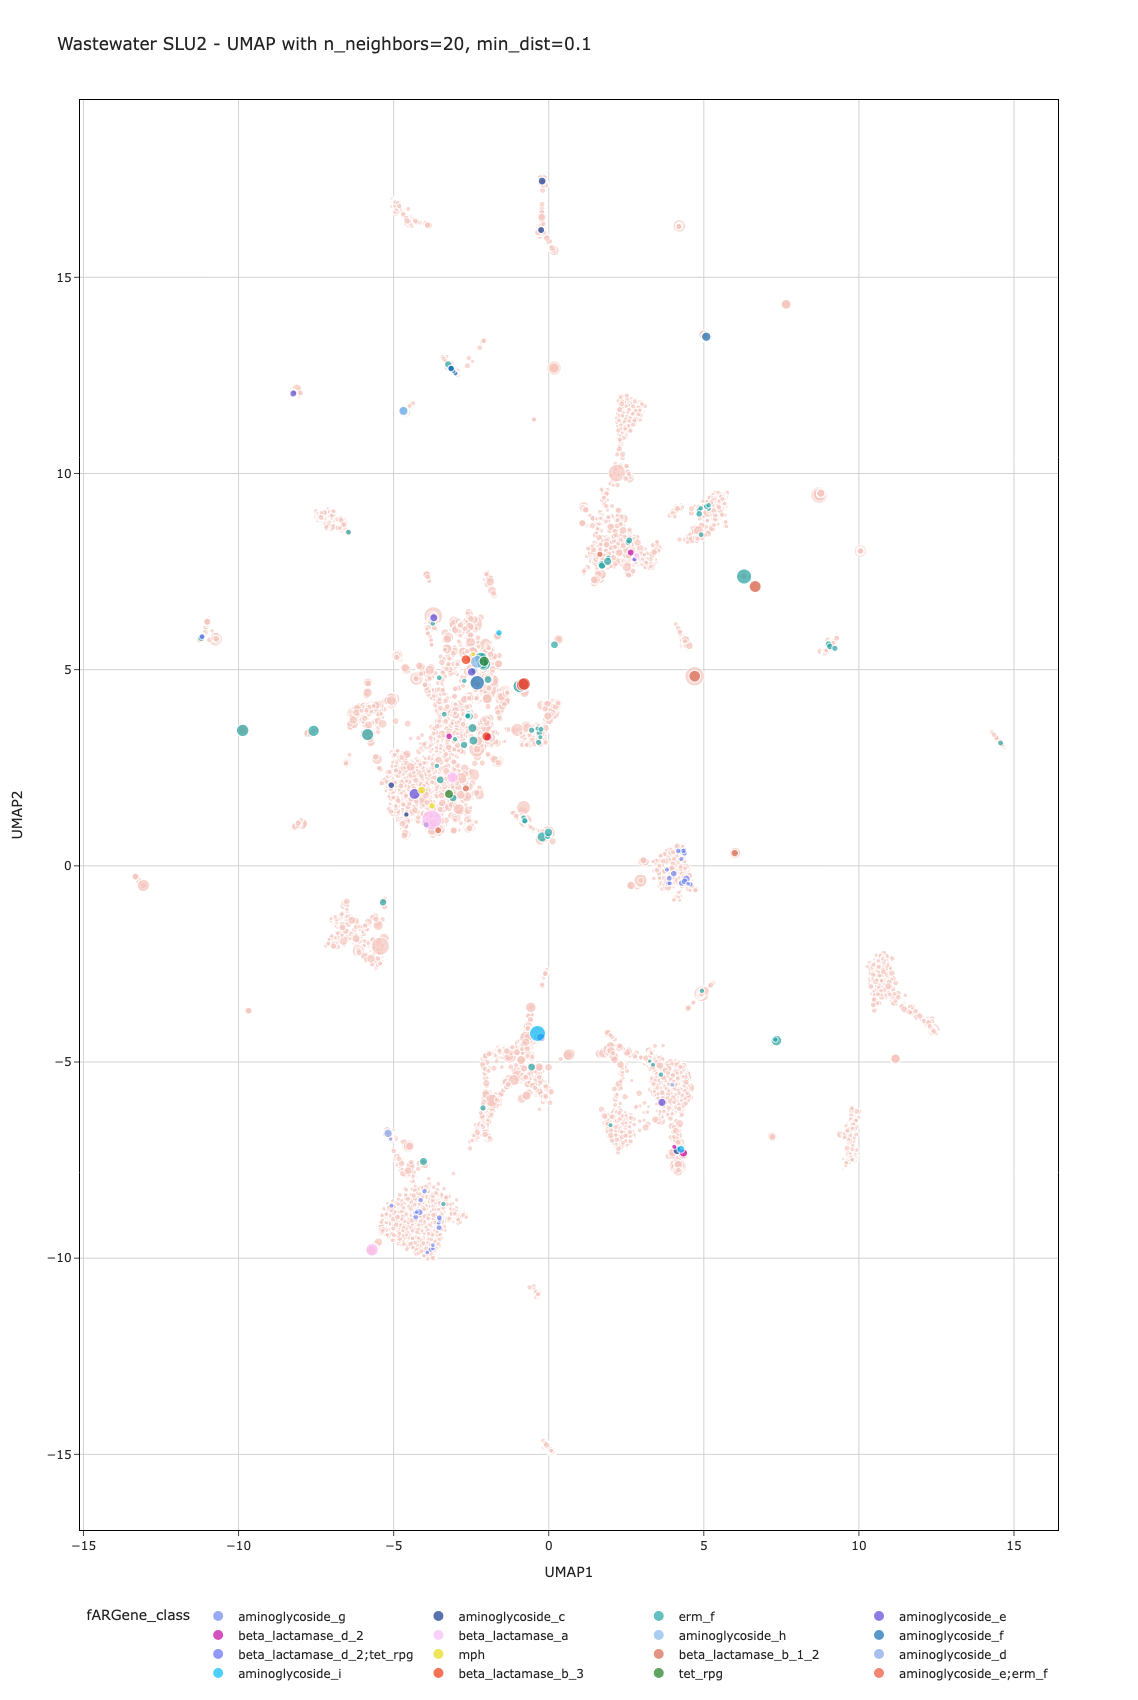

In [100]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#f5c7bf', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

SLU2_UMAP_df_focused['fARGene_class'] = SLU2_UMAP_df_focused['fARGene_class'].astype(str)
SLU2_UMAP_df_focused['fARGene_class'] = SLU2_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU2_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(SLU2_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater SLU2 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater SLU2 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/SLU2_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/SLU2_UMAP_{n}_{m}_fARGene.html')

In [ ]:
print(SLU2_UMAP_df_focused['fARGene_class'].unique())

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C1f = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 4.5) & (SLU2_UMAP_df_focused['UMAP1']<= 5)
    & (SLU2_UMAP_df_focused['UMAP2']>= 4.8) & (SLU2_UMAP_df_focused['UMAP2']<= 5)]

# Check
SLU2_df_focused_C1f.head()

SLU2_df_C1f = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C1f['contig'])]
print(SLU2_df_C1f)

In [ ]:
# Save contig IDs
SLU2_C1f_contigs = SLU2_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C1f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C2f (fARGene)

In [101]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C2f = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 5.8) & (SLU2_UMAP_df_focused['UMAP1']<= 6.2)
    & (SLU2_UMAP_df_focused['UMAP2']>= 0.2) & (SLU2_UMAP_df_focused['UMAP2']<= 0.4)]

# Check
SLU2_df_focused_C2f.head()

SLU2_df_C2f = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C2f['contig'])]
print(SLU2_df_C2f)

                   -20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                          
s3.ctg002619l      -0.028852  -0.041147  -0.066200   0.033329  -0.010688   
s3.ctg026090l       0.159685   0.264233   0.042916  -0.089313   0.336043   
s3.ctg053952l       0.110714  -0.086590   0.196460   0.064916  -0.086590   
s12277.ctg017591l   0.144319  -0.076766  -0.076766  -0.108183  -0.361026   
s3.ctg007372l       0.013655  -0.072956   0.027388  -0.135166  -0.000269   
s2737.ctg003897l    0.024119  -0.026686  -0.056920   0.099079   0.058890   
s10536.ctg015079l  -0.210194   0.072155  -0.087537  -0.031425  -0.350027   
s7224.ctg010340l    0.237783   0.051742  -0.474099  -0.596621  -0.220788   
s18663.ctg026685l   0.222985   0.222985  -0.328214  -0.159456  -0.060947   
s3.ctg006632l      -0.072514  -0.242585  -0.072514  -0.146256   0.022364   
s40339.ctg060935l   0.078725   0.038403   0.383027   0.225488  -0.003613   
s3.ctg002389

In [ ]:
# Save contig IDs
SLU2_C2f_contigs = SLU2_df_C2f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C2f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C2f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C3f (fARGene)

In [106]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C3f = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= -2.05) & (SLU2_UMAP_df_focused['UMAP1']<= -2)
    & (SLU2_UMAP_df_focused['UMAP2']>= 3.28) & (SLU2_UMAP_df_focused['UMAP2']<= 3.3)]

# Check
SLU2_df_focused_C3f.head()

SLU2_df_C3f = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C3f['contig'])]
print(SLU2_df_C3f)

                   -20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                          
s33436.ctg048730l  -0.073805  -0.023249  -0.242894  -0.127053   0.024873   
s21678.ctg030997l   0.337980  -0.150445  -0.222986   0.337980  -0.019466   
s1938.ctg002734l   -0.080845  -0.113315  -0.049396  -0.049396  -0.080845   
s1579.ctg002238l    0.046742  -0.119413  -0.234211   0.031315   0.175819   
s3719.ctg005298l   -0.153202  -0.293268  -0.293268  -0.030365   0.079020   
s23669.ctg033902l   0.159130   0.108549  -0.124049   0.055273   0.108549   
s17171.ctg024531l  -0.552585  -0.054029  -0.054029  -0.121700   0.009352   
s4398.ctg006287l    0.029169   0.198277   0.248838  -0.101887   0.342882   
s3.ctg000356l      -0.107498  -0.009032   0.062059  -0.009032   0.116686   

                   -15_A_m4C  -14_A_m4C  -13_A_m4C  -12_A_m4C  -11_A_m4C  ...  \
0                                                                         ...   
s

In [107]:
# Save contig IDs
SLU2_C3f_contigs = SLU2_df_C3f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C3f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C3f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C4f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C4f = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= -5.75) & (SLU2_UMAP_df_focused['UMAP1']<= -5.65)
    & (SLU2_UMAP_df_focused['UMAP2']>= -9.82) & (SLU2_UMAP_df_focused['UMAP2']<= -9.76)]

# Check
SLU2_df_focused_C4f.head()

SLU2_df_C4f = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C4f['contig'])]
print(SLU2_df_C4f)

In [ ]:
# Save contig IDs
SLU2_C4f_contigs = SLU2_df_C4f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C4f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C4f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C5f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C5f = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 6.28) & (SLU2_UMAP_df_focused['UMAP1']<= 6.32)
    & (SLU2_UMAP_df_focused['UMAP2']>= 7.37) & (SLU2_UMAP_df_focused['UMAP2']<= 7.38)]

# Check
SLU2_df_focused_C5f.head()

SLU2_df_C5f = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C5f['contig'])]
print(SLU2_df_C5f)

In [ ]:
# Save contig IDs
SLU2_C5f_contigs = SLU2_df_C5f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C5f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C5f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C6f (fARGene)

In [102]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C6f = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= 6.6) & (SLU2_UMAP_df_focused['UMAP1']<= 6.7)
    & (SLU2_UMAP_df_focused['UMAP2']>= 7.0) & (SLU2_UMAP_df_focused['UMAP2']<= 7.2)]

# Check
SLU2_df_focused_C6f.head()

SLU2_df_C6f = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C6f['contig'])]
print(SLU2_df_C6f)

                   -20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                          
s14720.ctg021015l  -0.101325   0.328316   0.328316   0.063258   0.136394   
s3.ctg005039l       0.050705   0.053902  -0.046760   0.044280  -0.057406   
s3.ctg000641l      -0.267495  -0.059787  -0.059787   0.042025  -0.033346   
s3.ctg001301l       0.156921   0.028768   0.042348   0.138714  -0.049410   
s3.ctg000177l       0.020873  -0.018235  -0.106970   0.003400  -0.022102   
s3.ctg012630l      -0.037682  -0.105909  -0.042404   0.034985  -0.037682   
s3.ctg006861l       0.071738   0.026421  -0.021049   0.171334  -0.123334   
s3.ctg003783l       0.041001  -0.054006  -0.008171   0.060797   0.023522   
s3.ctg000141l      -0.063469  -0.215992   0.068839   0.099352   0.099352   
s3845.ctg005493l    0.154720  -0.036099  -0.066594   0.249365  -0.098048   
s3.ctg009867l       0.073516  -0.163889  -0.157212   0.119968  -0.170610   
s3.ctg001997

In [ ]:
# Save contig IDs
SLU2_C6f_contigs = SLU2_df_C6f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C6f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C6f_contigs:
        file.write(f"{item}\n")

### Extract clusters 
#### C7f (fARGene)

In [103]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU2_df_focused_C7f = SLU2_UMAP_df_focused.loc[(SLU2_UMAP_df_focused['UMAP1']>= -0.846) & (SLU2_UMAP_df_focused['UMAP1']<= -0.836)
    & (SLU2_UMAP_df_focused['UMAP2']>= 4.617) & (SLU2_UMAP_df_focused['UMAP2']<= 4.6185)]

# Check
SLU2_df_focused_C7f.head()

SLU2_df_C7f = SLU2_df_focused[SLU2_df_focused.index.isin(SLU2_df_focused_C7f['contig'])]
print(SLU2_df_C7f)

                  -20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                         
s3.ctg004311l     -0.159807   0.086825  -0.015367  -0.159807  -0.070665   
s3.ctg000765l     -0.048730  -0.094395  -0.118034  -0.106145   0.062073   
s2207.ctg003132l   0.066551   0.154263  -0.148541  -0.029600   0.144888   

                  -15_A_m4C  -14_A_m4C  -13_A_m4C  -12_A_m4C  -11_A_m4C  ...  \
0                                                                        ...   
s3.ctg004311l     -0.129202  -0.159807  -0.042634  -0.578153   0.179534  ...   
s3.ctg000765l     -0.059953   0.021297  -0.179699  -0.252233  -0.154575  ...   
s2207.ctg003132l  -0.099254  -0.052283  -0.007420  -0.456747  -0.087303  ...   

                  19_G_m6A  20_G_m6A  sample  mod_count  mod_count_log  \
0                                                                        
s3.ctg004311l     0.187161  0.374094    SLU2       1653      10.690871   
s

In [ ]:
# Save contig IDs
SLU2_C7f_contigs = SLU2_df_C7f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU2_C7f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU2_C7f_contigs:
        file.write(f"{item}\n")

# SLU3 preanalysis
## Import data
### > 50 lines in .gff

In [ ]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW_above50/'

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU3_matrices_top50/flattened/SLU3_concat_matrices_top50.tsv'
SLU3_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(SLU3_matrices.shape[0])

In [ ]:
print(SLU3_matrices.shape)
SLU3_matrices.head()

In [ ]:
SLU3_df = SLU3_matrices.loc[(SLU3_matrices.iloc[:, :492] != 0).any(axis=1)]
print(SLU3_df.shape)

In [ ]:
SLU3_df['sample'].value_counts()
print(SLU3_df.iloc[:, :-1])

## Attach metadata
### Mod counts

In [ ]:
# Bring the mod counts from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU3_contigs/SLU3_mod_counts.txt'

SLU3_df_mod_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU3_df_mod_counts.shape[0])
SLU3_df_mod_counts.head()

In [ ]:
# Append to merged_data.tsv
SLU3_df_ext = SLU3_df.copy()
SLU3_df_ext.head()
SLU3_df_mod_counts.head()

# Reorder to match
SLU3_df_ordered = SLU3_df_mod_counts.loc[SLU3_df_ext.index]

# Check the min mod counts
SLU3_df_ordered['mod_count'].min()

In [ ]:
# Log transform
SLU3_df_ordered['mod_count_log'] = np.log2(SLU3_df_ordered['mod_count'])

SLU3_df_mod_counts = pd.concat([SLU3_df_ext, SLU3_df_ordered], axis=1)
print(SLU3_df_mod_counts.iloc[:, :-3])
SLU3_df_mod_counts.head()
SLU3_df = SLU3_df_mod_counts.copy()

### ARG counts (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU3_contigs/SLU3_ARG_counts.txt'

SLU3_df_ARG_counts = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU3_df_ARG_counts.shape[0])
SLU3_df_ARG_counts.head()

In [ ]:
## Append to merged_data.tsv
SLU3_df_ext = SLU3_df.copy()
SLU3_df_ext.head()
SLU3_df_ARG_counts.head()

# Reorder to match
SLU3_df_ordered = SLU3_df_ARG_counts.loc[SLU3_df_ext.index]

SLU3_df_ARG_counts = pd.concat([SLU3_df_ext, SLU3_df_ordered], axis=1)
print(SLU3_df_ARG_counts.iloc[:, :-4])
SLU3_df_ARG_counts.head()
SLU3_df = SLU3_df_ARG_counts.copy()

### ARG names (ResFinder)

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU3_contigs/SLU3_ARG_names.txt'

SLU3_df_ARG_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU3_df_ARG_names.shape[0])
SLU3_df_ARG_names.head()

# Replace NaN with empty
SLU3_df_ARG_names = SLU3_df_ARG_names.fillna('')

In [ ]:
## Append to merged_data.tsv
SLU3_df_ext = SLU3_df.copy()
SLU3_df_ext.head()
SLU3_df_ARG_names.head()

# Reorder to match
SLU3_df_ordered = SLU3_df_ARG_names.loc[SLU3_df_ext.index]

SLU3_df_ARG_names = pd.concat([SLU3_df_ext, SLU3_df_ordered], axis=1)
print(SLU3_df_ARG_names.iloc[:, :-5])
SLU3_df_ARG_names.head()
SLU3_df = SLU3_df_ARG_names.copy()

### Contig lengths

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU3_contigs/SLU3_contigs_lengths.txt'

SLU3_df_contigs_lengths = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU3_df_contigs_lengths.shape[0])
SLU3_df_contigs_lengths.head()

In [ ]:
## Append to merged_data.tsv
SLU3_df_ext = SLU3_df.copy()
SLU3_df_ext.head()
SLU3_df_contigs_lengths.head()

# Reorder to match
SLU3_df_ordered = SLU3_df_contigs_lengths.loc[SLU3_df_ext.index]

# Log transform
SLU3_df_ordered['length_sqrt'] = np.sqrt(SLU3_df_ordered['length'])

# Concat
SLU3_df_contigs_lengths = pd.concat([SLU3_df_ext, SLU3_df_ordered], axis=1)
print(SLU3_df_contigs_lengths.iloc[:, :-7])
SLU3_df_contigs_lengths.head()
SLU3_df = SLU3_df_contigs_lengths.copy()

### fARGene results

In [ ]:
## Bring the contig lengths from Puhti:
file_path = '/scratch/project_2006608/Methylation/WW_data/SLU3_contigs/SLU3_fARGene_names.txt'

SLU3_df_fARGene_names = pd.read_csv(file_path, sep='\t', index_col=0, header=0, low_memory=False)
print(SLU3_df_fARGene_names.shape[0])
SLU3_df_fARGene_names.head()

# Replace NaN with empty
SLU3_df_fARGene_names = SLU3_df_fARGene_names.fillna('')
SLU3_df_fARGene_names.head()

In [ ]:
## Append to merged_data.tsv
SLU3_df_ext = SLU3_df.copy()
SLU3_df_ext.head()
SLU3_df_fARGene_names.head()

# Reorder to match
SLU3_df_ordered = SLU3_df_fARGene_names.loc[SLU3_df_ext.index]

SLU3_df_fARGene_names = pd.concat([SLU3_df_ext, SLU3_df_ordered], axis=1)
print(SLU3_df_fARGene_names.iloc[:, :-8])
SLU3_df_fARGene_names.head()
SLU3_df = SLU3_df_fARGene_names.copy()

### Explore ARGs

In [ ]:
# Print those with erm(F)_3
erm_F = SLU3_df[SLU3_df['ARG_name'].str.contains('erm(F)_3', case=False, na=False, regex=False)]
print(erm_F)

In [ ]:
SLU3_df.head()
#print(SLU3_df.iloc[:, :-8])
#print(SLU3_df.index)

## Draw UMAP

In [ ]:
n_neighbors = [20]
min_dist = [0.1]
#colors = [0, 1, 2, 3]
#color_map = {0: '#8ce6e9', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
#custom_colors = [color_map[val] for val in colors]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU3_df.iloc[:, :-8])
        SLU3_UMAP_df  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': SLU3_df.index,
            'mod_count':SLU3_df['mod_count'],
            'mod_count_log':SLU3_df['mod_count_log'],
            'ARG_name':SLU3_df['ARG_name'],
            'ARG_count':SLU3_df['ARG_count'],
            'contig_length':SLU3_df['length'],
            'contig_length_sqrt':SLU3_df['length_sqrt'],
            'fARGene_class':SLU3_df['fARGene']
        })

        SLU3_UMAP_df['ARG_count'] = SLU3_UMAP_df['ARG_count'].astype(str)
        
        fig = px.scatter(SLU3_UMAP_df, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='mod_count_log',
                            #color='ARG_count',
                            title=f' Wastewater SLU3 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_continuous_scale=px.colors.sequential.Rainbow,
                            #color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater SLU3 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_above50/SLU3_UMAP_{n}_{m}_mod_counts_lengths.png')
        fig.write_html(f'UMAP_WW_above50/SLU3_UMAP_{n}_{m}_mod_counts_lengths.html')

## Exclude 'möykky'

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_UMAP_df_focused1 = SLU3_UMAP_df.loc[(SLU3_UMAP_df['UMAP1']>= -12) & (SLU3_UMAP_df['UMAP1']<= 16)
    & (SLU3_UMAP_df['UMAP2']>= -2.6) & (SLU3_UMAP_df['UMAP2']<= 21)]

SLU3_UMAP_df_focused2 = SLU3_UMAP_df.loc[(SLU3_UMAP_df['UMAP1']>= 2) & (SLU3_UMAP_df['UMAP1']<= 16)
    & (SLU3_UMAP_df['UMAP2']>= -10) & (SLU3_UMAP_df['UMAP2']<= -2.6)]

SLU3_UMAP_df_focused = pd.concat([SLU3_UMAP_df_focused1, SLU3_UMAP_df_focused2], ignore_index=False)

# Check
SLU3_UMAP_df_focused.head()

SLU3_df_focused = SLU3_df[SLU3_df.index.isin(SLU3_UMAP_df_focused['contig'])]
print(SLU3_df_focused)

In [ ]:
# Save contig IDs
SLU3_focused_contigs = SLU3_df_focused.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_focused_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_focused_contigs:
        file.write(f"{item}\n")

In [ ]:
print(SLU3_df_focused.iloc[:, :-8])

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#f5c7bf', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]
category_order = ["0", "1", "2", "3"]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU3_df_focused.iloc[:, :-8])
        SLU2_UMAP_df_focused  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': SLU3_df_focused.index,
            'mod_count':SLU3_df_focused['mod_count'],
            'mod_count_log':SLU3_df_focused['mod_count_log'],
            'ARG_name':SLU3_df_focused['ARG_name'],
            'ARG_count':SLU3_df_focused['ARG_count'],
            'contig_length':SLU3_df_focused['length'],
            'contig_length_sqrt':SLU3_df_focused['length_sqrt'],
            'fARGene_class':SLU3_df_focused['fARGene']
        })

        SLU3_UMAP_df_focused['ARG_count'] = SLU3_UMAP_df_focused['ARG_count'].astype(str)

        fig = px.scatter(SLU3_UMAP_df_focused, 
                            x='UMAP1', 
                            y='UMAP2', 
                            color='ARG_count',
                            category_orders={'ARG_count': category_order},
                            title=f' Wastewater SLU3 - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=custom_colors,
                            hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                                       'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                        size='contig_length_sqrt')
        title = f' Wastewater SLU3 - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1700,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.05,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()

## Save data

In [ ]:
# Check
#SLU3_df_focused.head()
#SLU3_UMAP_df_focused.head()

In [ ]:
# Save data
SLU3_df_focused.to_csv('UMAP_WW_above50/SLU3_df_focused.csv', sep='\t', index=True)
SLU3_UMAP_df_focused.to_csv('UMAP_WW_above50/SLU3_UMAP_df_focused.csv', sep='\t', index=True)

# SLU3: Read in and plot

In [ ]:
# Read data
SLU3_df_focused = pd.read_csv('UMAP_WW_above50/SLU3_df_focused.csv', sep='\t', index_col=0, low_memory=False)
SLU3_UMAP_df_focused = pd.read_csv('UMAP_WW_above50/SLU3_UMAP_df_focused.csv', sep='\t', index_col=0, low_memory=False)

# Check
SLU3_df_focused.head()
SLU3_UMAP_df_focused.head()

## Plot ARG counts

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = [0, 1, 2, 3]
color_map = {0: '#f5c7bf', 1: '#fa7a31', 2: '#eb340f', 3: '#d01af5'}

# Map colors to each data point
custom_colors = [color_map[val] for val in colors]

SLU3_UMAP_df_focused['ARG_count'] = SLU3_UMAP_df_focused['ARG_count'].astype(str)
category_order = ["0", "1", "2", "3"]

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU2_UMAP_df_focused.iloc[:, :-8])
        
fig = px.scatter(SLU3_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='ARG_count',
                 title=f' Wastewater SLU3 - UMAP with n_neighbors={n}, min_dist={m}',
                 category_orders={'ARG_count': category_order},
                 color_discrete_sequence=custom_colors,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater SLU3 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/SLU3_UMAP_{n}_{m}_focused_ARG_counts.png')
fig.write_html(f'UMAP_WW_above50/SLU3_UMAP_{n}_{m}_focused_ARG_counts.html')

### Extract clusters
#### C1

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C1 = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= 8.95) & (SLU3_UMAP_df_focused['UMAP1']<= 9.05)
    & (SLU3_UMAP_df_focused['UMAP2']>= -2.06) & (SLU3_UMAP_df_focused['UMAP2']<= -2.03)]

# Check
SLU3_df_focused_C1.head()

SLU3_df_C1 = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C1['contig'])]
print(SLU3_df_C1)

In [ ]:
# Save contig IDs
SLU3_C1_contigs = SLU3_df_C1.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C1_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C1_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C2

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C2 = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= -9.05) & (SLU3_UMAP_df_focused['UMAP1']<= -9.03)
    & (SLU3_UMAP_df_focused['UMAP2']>= 9.332) & (SLU3_UMAP_df_focused['UMAP2']<= 9.338)]

# Check
SLU3_df_focused_C2.head()

SLU3_df_C2 = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C2['contig'])]
print(SLU3_df_C2)

In [ ]:
# Save contig IDs
SLU3_C2_contigs = SLU3_df_C2.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C2_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C2_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C3

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C3 = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= 6.9) & (SLU3_UMAP_df_focused['UMAP1']<= 7)
    & (SLU3_UMAP_df_focused['UMAP2']>= 6.82) & (SLU3_UMAP_df_focused['UMAP2']<= 6.84)]

# Check
SLU3_df_focused_C3.head()

SLU3_df_C3 = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C3['contig'])]
print(SLU3_df_C3)

In [ ]:
# Save contig IDs
SLU3_C3_contigs = SLU3_df_C3.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C3_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C3_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C4

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C4 = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= 9.58) & (SLU3_UMAP_df_focused['UMAP1']<= 9.62)
    & (SLU3_UMAP_df_focused['UMAP2']>= 4.6) & (SLU3_UMAP_df_focused['UMAP2']<= 4.7)]

# Check
SLU3_df_focused_C4.head()

SLU3_df_C4 = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C4['contig'])]
print(SLU3_df_C4)

In [ ]:
# Save contig IDs
SLU3_C4_contigs = SLU3_df_C4.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C4_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C4_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C5

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C5 = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= 2.02) & (SLU3_UMAP_df_focused['UMAP1']<= 2.04)
    & (SLU3_UMAP_df_focused['UMAP2']>= 6.14) & (SLU3_UMAP_df_focused['UMAP2']<= 6.816)]

# Check
SLU3_df_focused_C5.head()

SLU3_df_C5 = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C5['contig'])]
print(SLU3_df_C5)

In [ ]:
# Save contig IDs
SLU3_C5_contigs = SLU3_df_C5.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C5_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C5_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C6

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C6 = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= 0.992) & (SLU3_UMAP_df_focused['UMAP1']<= 0.996)
    & (SLU3_UMAP_df_focused['UMAP2']>= 3.2325) & (SLU3_UMAP_df_focused['UMAP2']<= 3.2335)]

# Check
SLU3_df_focused_C6.head()

SLU3_df_C6 = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C6['contig'])]
print(SLU3_df_C6)

In [ ]:
# Save contig IDs
SLU3_C6_contigs = SLU3_df_C6.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C6_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C6_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C7

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C7 = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= 0.4) & (SLU3_UMAP_df_focused['UMAP1']<= 0.45)
    & (SLU3_UMAP_df_focused['UMAP2']>= 3.53) & (SLU3_UMAP_df_focused['UMAP2']<= 3.535)]

# Check
SLU3_df_focused_C7.head()

SLU3_df_C7 = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C7['contig'])]
print(SLU3_df_C7)

In [ ]:
# Save contig IDs
SLU3_C7_contigs = SLU3_df_C7.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C7_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C7_contigs:
        file.write(f"{item}\n")

### Extract clusters
#### C8

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C8 = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= -0.7) & (SLU3_UMAP_df_focused['UMAP1']<= -0.5)
    & (SLU3_UMAP_df_focused['UMAP2']>= 3.75) & (SLU3_UMAP_df_focused['UMAP2']<= 3.8)]

# Check
SLU3_df_focused_C8.head()

SLU3_df_C8 = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C8['contig'])]
print(SLU3_df_C8)

In [ ]:
# Save contig IDs
SLU3_C8_contigs = SLU3_df_C8.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C8_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C8_contigs:
        file.write(f"{item}\n")

## Plot fARGene

In [ ]:
n_neighbors = [20]
min_dist = [0.1]

colors = ['', 'beta_lactamase_a', 'beta_lactamase_b_1_2', 'beta_lactamase_b_3', 'beta_lactamase_c', 'beta_lactamase_d_1', 'beta_lactamase_d_2',
          'beta_lactamase_a;tet_enzyme', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i', 'erm_f;tet_rpg',
          'erm_f;tet_enzyme','aminoglycoside_d;beta_lactamase_a;qnr', 'aminoglycoside_c;aminoglycoside_i;tet_efflux', 'beta_lactamase_c;tet_efflux',
          'beta_lactamase_d_2;tet_efflux', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a',
          'mph', 'qnr', 'mph;tet_efflux', 'beta_lactamase_a;mph', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux',
          'tet_efflux', 'tet_rpg', 'tet_enzyme', 'beta_lactamase_d_2;erm_f;tet_rpg',
          'erm_a', 'erm_f', 'aminoglycoside_a', 'aminoglycoside_b',
          'aminoglycoside_c', 'aminoglycoside_d', 'aminoglycoside_e', 'aminoglycoside_f',
          'aminoglycoside_g', 'aminoglycoside_h', 'aminoglycoside_i']

color_map = {'': '#f5c7bf', 'beta_lactamase_a': '#fabefa', 'beta_lactamase_b_1_2': '#d86950', 'beta_lactamase_b_3': '#ef360c', 'beta_lactamase_c': '#ef360c', 'beta_lactamase_d_1': '#a27faf', 'beta_lactamase_d_2': '#c308a4',
          'beta_lactamase_a;beta_lactamase_b_3': '#ff4292', 'beta_lactamase_b_1_2;beta_lactamase_d_2': '#ffa142',
          'beta_lactamase_a;beta_lactamase_d_2': '#a40707', 
          'beta_lactamase_a;tet_enzyme': '#810a71', 'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i': '#079da4', 'erm_f;tet_rpg': '#41677c', 'erm_f;tet_enzyme': '#6f8e9f',
          'aminoglycoside_d;beta_lactamase_a;qnr': '#9cc861', 'aminoglycoside_c;aminoglycoside_i;tet_efflux': '#08e0bc', 'beta_lactamase_c;tet_efflux': '#09681f',
          'beta_lactamase_d_2;tet_efflux': '#53f7fc', 'aminoglycoside_d;beta_lactamase_a;beta_lactamase_c;qnr': '#f9741e',
          'aminoglycoside_c;aminoglycoside_h;aminoglycoside_i;beta_lactamase_a': '#82a586', 'aminoglycoside_c;aminoglycoside_i;beta_lactamase_a;tet_efflux': '#076fb6',
          'mph': '#e8db16', 'qnr': 'black', 'mph;tet_efflux': '#0b4877', 'beta_lactamase_a;mph': '#a25202',
          'tet_efflux': '#04c60a', 'tet_rpg': '#1e7e21', 'tet_enzyme': '#779e78', 'beta_lactamase_d_2;erm_f;tet_rpg': '#fd80e1',
          'erm_a': '#66e4e4', 'erm_f': '#25a5a5',
          'aminoglycoside_a': "#e8db16", 'aminoglycoside_b': "#1656e8", 'aminoglycoside_c': "#0f378e",
          'aminoglycoside_d': "#86a4eb", 'aminoglycoside_e': "#5b48d8", 'aminoglycoside_f': "#146eb4",
          'aminoglycoside_g': "#6f87f3", 'aminoglycoside_h': "#85baec", 'aminoglycoside_i': "#04bdfe"}

SLU3_UMAP_df_focused['fARGene_class'] = SLU3_UMAP_df_focused['fARGene_class'].astype(str)
SLU3_UMAP_df_focused['fARGene_class'] = SLU3_UMAP_df_focused['fARGene_class'].replace('nan', '')

for n in n_neighbors:
    for m in min_dist:
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(SLU3_UMAP_df_focused.iloc[:, :-8])

fig = px.scatter(SLU3_UMAP_df_focused, 
                 x='UMAP1', 
                 y='UMAP2', 
                 color='fARGene_class',
                 title=f' Wastewater SLU3 - UMAP with n_neighbors={n}, min_dist={m}', 
                 color_discrete_map=color_map,
                 hover_data={'contig': True, 'mod_count': True, 'ARG_name': True,
                             'ARG_count': True, 'contig_length': True, 'fARGene_class': True},
                size='contig_length_sqrt')
title = f' Wastewater SLU3 - UMAP with n_neighbors={n}, min_dist={m}'
fig.update_layout(height=1700, width=1200, title_text=title, showlegend=True, 
                  legend=dict(x=0.5, y=-0.05, traceorder="normal",xanchor='center', yanchor='top', orientation='h'), 
                  template='simple_white', 
                  xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showline=True, linecolor='black', linewidth=1, mirror=True))
fig.show()
fig.write_image(f'UMAP_WW_above50/SLU3_UMAP_{n}_{m}_fARGene.png')
fig.write_html(f'UMAP_WW_above50/SLU3_UMAP_{n}_{m}_fARGene.html')

In [ ]:
print(SLU3_UMAP_df_focused['fARGene_class'].unique())

### Extract clusters 
#### C1f (fARGene)

In [ ]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
SLU3_df_focused_C1f = SLU3_UMAP_df_focused.loc[(SLU3_UMAP_df_focused['UMAP1']>= 4.5) & (SLU3_UMAP_df_focused['UMAP1']<= 5)
    & (SLU3_UMAP_df_focused['UMAP2']>= 4.8) & (SLU3_UMAP_df_focused['UMAP2']<= 5)]

# Check
SLU3_df_focused_C1f.head()

SLU3_df_C1f = SLU3_df_focused[SLU3_df_focused.index.isin(SLU3_df_focused_C1f['contig'])]
print(SLU3_df_C1f)

In [ ]:
# Save contig IDs
SLU3_C1f_contigs = SLU3_df_C1f.index.to_list()

directory = 'UMAP_WW_above50'
file_path = os.path.join(directory, 'SLU3_C1f_contigs.txt')

with open(file_path, 'w') as file:
    for item in SLU3_C1f_contigs:
        file.write(f"{item}\n")